## **I.Objectif**
#### Nous voulons développer un modèle ML capable prédire avec précision  la valeur médiane des prix des maisons dans n'importe quel district de  la Californie

In [1]:
# Mes librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px
import plotly.graph_objects as go

### Les données dans un DataFrame

In [2]:
df = pd.read_csv("housing.csv")
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

## **II.Nettoyage des données**

**1.Identification des types des variables et vérification des variables à valeur manquantes**

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# On impute total_bedrooms par la médiane
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median_bedrooms)


In [5]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [6]:
df['median_income'] = df['median_income'] *10000

In [7]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680   38706.710029   
std        419.391878   1132.462122    382.329753   18998.217179   
min          1.000000      3.000000      1.000000    4999.000000   
25%        297.000000    787.000000    280.000000   25634.000000   
50%        435.000000   1166.000000    409.000000   35348.000000   
75%        643.250000   1725.000000    605.000000   47432.500000   
max       6445.000000  35682.000000   6082.000000  150001.000000   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [8]:
a = (df['ocean_proximity'] == 'ISLAND').sum()
a

np.int64(5)

In [9]:
c = df[df['ocean_proximity'] == 'ISLAND']

# Show the result
a = pd.DataFrame(c)
a

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8314    -118.32     33.35                27.0       1675.0           521.0   
8315    -118.33     33.34                52.0       2359.0           591.0   
8316    -118.32     33.33                52.0       2127.0           512.0   
8317    -118.32     33.34                52.0        996.0           264.0   
8318    -118.48     33.43                29.0        716.0           214.0   

      population  households  median_income  median_house_value  \
8314       744.0       331.0        21579.0            450000.0   
8315      1100.0       431.0        28333.0            414700.0   
8316       733.0       288.0        33906.0            300000.0   
8317       341.0       160.0        27361.0            450000.0   
8318       422.0       173.0        26042.0            287500.0   

     ocean_proximity  
8314          ISLAND  
8315          ISLAND  
8316          ISLAND  
8317          ISLAND  
8318          ISLAND

In [10]:
# verifions si population est toujours supériueure à households
pd.set_option('display.expand_frame_repr', False)  # <-- empêche le wrapping

df['pop_ge_households'] = df['population'] >= df['households']

all_valid = df['pop_ge_households'].all()
print(f"Toutes les lignes ont population >= households ? : {all_valid}")

if not all_valid:
    print("Lignes où population < households :")
    print(df.loc[~df['pop_ge_households']])


Toutes les lignes ont population >= households ? : False
Lignes où population < households :
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity  pop_ge_households
5342     -118.44     34.04                16.0         18.0             6.0         3.0         4.0         5360.0            350000.0       <1H OCEAN              False
11849    -121.00     39.75                 8.0       1116.0           214.0        27.0        39.0        25893.0             83000.0          INLAND              False
19522    -121.00     37.65                17.0        484.0           202.0       198.0       204.0         6825.0            187500.0          INLAND              False


In [11]:
# On garde les lignes ou population >= households
df = df[df['population'] >= df['households']].copy()
df.shape

(20637, 11)

In [12]:
# verifions si total_rooms est toujours supériueure à total_rooms
# Créer une colonne booléenne indiquant si total_rooms >= total_bedrooms
df['pop_ge'] = df['total_rooms'] >= df['total_bedrooms']

# Vérifier si toutes les lignes respectent cette condition
all_valid = df['pop_ge'].all()
print(f"Toutes les lignes ont total_rooms >= total_bedrooms ? : {all_valid}")

# Afficher les lignes où ce n'est pas vrai
if not all_valid:
    print("Lignes où total_rooms < total_bedrooms :")
    print(df.loc[~df['pop_ge']])


Toutes les lignes ont total_rooms >= total_bedrooms ? : False
Lignes où total_rooms < total_bedrooms :
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity  pop_ge_households  pop_ge
2826     -119.11     35.42                52.0        154.0           435.0        37.0        16.0       100263.0            200000.0          INLAND               True   False
9877     -121.85     36.61                38.0        238.0           435.0       191.0        67.0        13897.0            125000.0       <1H OCEAN               True   False
9942     -122.23     38.17                45.0        350.0           435.0       225.0        72.0        18942.0            216700.0        NEAR BAY               True   False
13597    -117.28     34.09                44.0        376.0           435.0       273.0       107.0        22917.0             90800.0          INLAND               True   False
19391  

In [13]:
# On garde les lignes ou total_rooms >= total_bedrooms
df = df[df['total_rooms'] >= df['total_bedrooms']].copy()
df.shape

(20632, 12)

In [14]:
# Crée une colonne booléenne indiquant si median_house_value >= median_income
df['value_ge_income'] = df['median_house_value'] >= df['median_income']

# Vérifier si toutes les lignes respectent cette condition
all_valid = df['value_ge_income'].all()
print(f"Toutes les lignes ont median_house_value >= median_income ? : {all_valid}")

# Afficher les lignes où ce n'est pas vrai
if not all_valid:
    print("Lignes où median_house_value < median_income :")
    print(df.loc[~df['value_ge_income']])


Toutes les lignes ont median_house_value >= median_income ? : False
Lignes où median_house_value < median_income :
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity  pop_ge_households  pop_ge  value_ge_income
1825     -122.32     37.93                33.0        296.0            73.0       216.0        63.0        26750.0             22500.0        NEAR BAY               True    True            False
2521     -122.74     39.71                16.0        255.0            73.0        85.0        38.0        16607.0             14999.0          INLAND               True    True            False
2763     -115.88     32.93                15.0        208.0            49.0        51.0        20.0        40208.0             32500.0          INLAND               True    True            False
2774     -115.80     33.26                 2.0         96.0            18.0        30.0        16.0      

In [15]:
# On dépose ces nouvelles variables créé qui n'aide pas
df = df.drop(columns =['pop_ge_households','pop_ge'])
df.shape

(20632, 11)

In [16]:
a = (df['ocean_proximity'] == 'ISLAND').sum()
a

np.int64(5)

#### **2.les doublons**

In [17]:
# Trouver les doublons (toutes les colonnes identiques)
doublons = df.duplicated()

# Afficher le nombre total de doublons
print(f"Nombre de doublons dans le DataFrame : {doublons.sum()}")


Nombre de doublons dans le DataFrame : 0


##### **3.Encodage de la variable ocean_proximity avec target encoder**

In [18]:
# Calcul de la moyenne de la cible pour chaque catégorie de 'ocean_proximity'
target_mean = df.groupby('ocean_proximity')['median_house_value'].mean()

# Remplacement des catégories par leur moyenne
df['ocean_proximity_encoded'] = df['ocean_proximity'].map(target_mean)

target_mean


ocean_proximity
<1H OCEAN     240084.851325
INLAND        124804.082340
ISLAND        380440.000000
NEAR BAY      259230.884229
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64

#### **4.Détection et traitement des valeurs abérrantes**

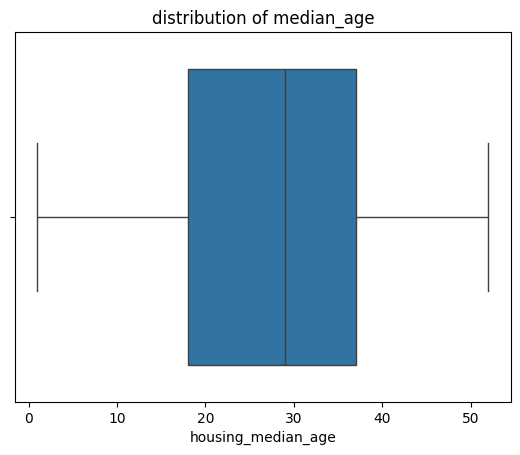

In [19]:

sns.boxplot(
    df,
    x="housing_median_age"
)
plt.title("distribution of median_age");

In [20]:
sns.boxplot(
    df,
    x="total_rooms"
)
plt.title("distribution of total rooms");

In [21]:
a = outliers = df[df['total_rooms'] > 30000]
c=pd.DataFrame(a)
c 


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity  value_ge_income  ocean_proximity_encoded
6057     -117.78     34.03                 8.0      32054.0          5290.0     15507.0      5050.0        60191.0            253900.0       <1H OCEAN             True            240084.851325
9019     -118.78     34.16                 9.0      30405.0          4093.0     12873.0      3931.0        80137.0            399200.0      NEAR OCEAN             True            249433.977427
9880     -121.79     36.64                11.0      32627.0          6445.0     28566.0      6082.0        23087.0            118800.0       <1H OCEAN             True            240084.851325
10309    -117.74     33.89                 4.0      37937.0          5471.0     16122.0      5189.0        74947.0            366300.0       <1H OCEAN             True            240084.851325
12201    -117.20     33.58                 2.0      30450.0          5033.0      9419.0      3197.0        45936.0            174300.0       <1H OCEAN             True            240084.851325
12215    -117.12     33.52                 4.0      30401.0          4957.0     13251.0      4339.0        45841.0            212300.0       <1H OCEAN             True            240084.851325
13139    -121.44     38.43                 3.0      39320.0          6210.0     16305.0      5358.0        49516.0            153700.0          INLAND             True            124804.082340

In [22]:
df = df[df['total_rooms'] <= 30000].copy()
df.shape


(20625, 12)

In [23]:
sns.boxplot(
    df,
    x="total_bedrooms"
)
plt.title("distribution of total bedrooms");

In [24]:
df = df[df['total_bedrooms'] <= 5000].copy()
df.shape

(20623, 12)

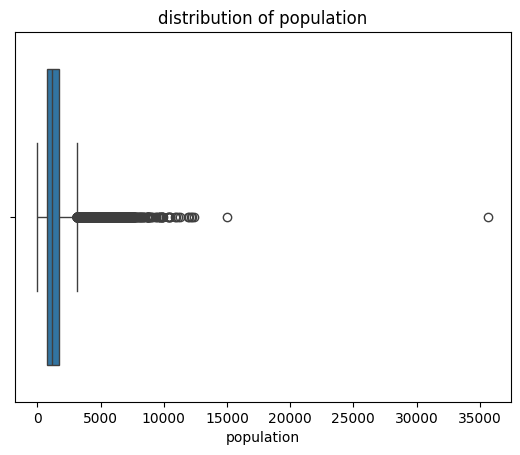

In [25]:
sns.boxplot(
    df,
    x="population"
)
plt.title("distribution of population");

In [26]:
df = df[df['population'] <= 14000].copy()
df.shape

(20621, 12)

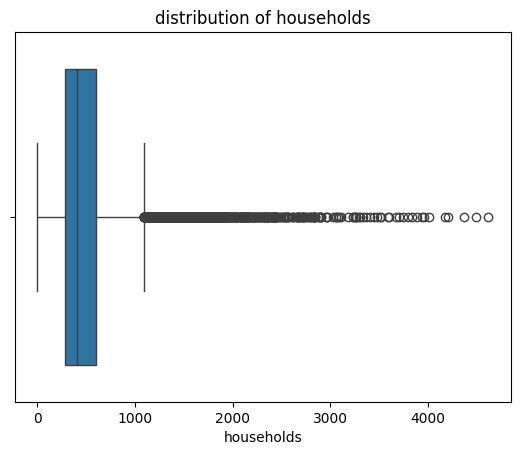

In [27]:
sns.boxplot(
    df,
    x="households"
)
plt.title("distribution of households");

In [28]:
df = df[df['households'] <= 4100].copy()
df.shape

(20616, 12)

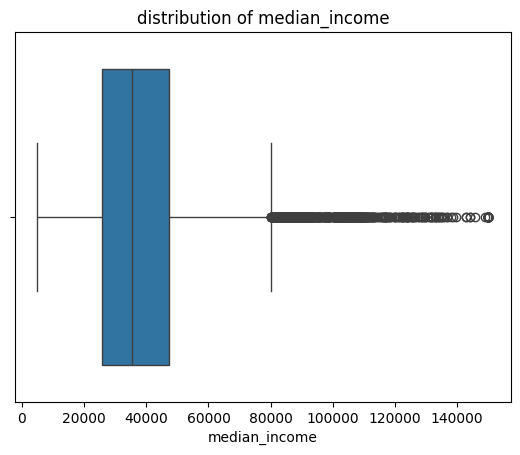

In [29]:
sns.boxplot(
    df,
    x="median_income"
)
plt.title("distribution of median_income");



In [30]:
sns.boxplot(
    df,
    x="median_house_value"
)
plt.title("distribution of median_house_value");

In [31]:
# Nous avons crée 3 variables : rooms_per_household,population_per_household et bedrooms_per_household
df.loc[:, 'rooms_per_household'] = df['total_rooms'] / df['households']
df.loc[:, 'population_per_household'] = df['population'] / df['households']
df.loc[:, 'bedrooms_per_household'] = df['total_bedrooms'] / df['households']


In [32]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity  value_ge_income  ocean_proximity_encoded  rooms_per_household  population_per_household  bedrooms_per_household
0        -122.23     37.88                41.0        880.0           129.0       322.0       126.0        83252.0            452600.0        NEAR BAY             True            259230.884229             6.984127                  2.555556                1.023810
1        -122.22     37.86                21.0       7099.0          1106.0      2401.0      1138.0        83014.0            358500.0        NEAR BAY             True            259230.884229             6.238137                  2.109842                0.971880
2        -122.24     37.85                52.0       1467.0           190.0       496.0       177.0        72574.0            352100.0        NEAR BAY             True            259230.884229             8.288136                  2.802260                1.073446
3        -122.25     37.85                52.0       1274.0           235.0       558.0       219.0        56431.0            341300.0        NEAR BAY             True            259230.884229             5.817352                  2.547945                1.073059
4        -122.25     37.85                52.0       1627.0           280.0       565.0       259.0        38462.0            342200.0        NEAR BAY             True            259230.884229             6.281853                  2.181467                1.081081
...          ...       ...                 ...          ...             ...         ...         ...            ...                 ...             ...              ...                      ...                  ...                       ...                     ...
20635    -121.09     39.48                25.0       1665.0           374.0       845.0       330.0        15603.0             78100.0          INLAND             True            124804.082340             5.045455                  2.560606                1.133333
20636    -121.21     39.49                18.0        697.0           150.0       356.0       114.0        25568.0             77100.0          INLAND             True            124804.082340             6.114035                  3.122807                1.315789
20637    -121.22     39.43                17.0       2254.0           485.0      1007.0       433.0        17000.0             92300.0          INLAND             True            124804.082340             5.205543                  2.325635                1.120092
20638    -121.32     39.43                18.0       1860.0           409.0       741.0       349.0        18672.0             84700.0          INLAND             True            124804.082340             5.329513                  2.123209                1.171920
20639    -121.24     39.37                16.0       2785.0           616.0      1387.0       530.0        23886.0             89400.0          INLAND             True            124804.082340             5.254717                  2.616981                1.162264

[20616 rows x 15 columns]

#### **III.EDA (Analyse Exploratoire des Données)**

**Matrice de corrélation**

In [33]:
cols = [
    'median_income',
    'housing_median_age',
    'total_rooms',
    'latitude',
    'longitude',
    'ocean_proximity_encoded',
    'rooms_per_household',
    'total_bedrooms',
    'households',
    'population_per_household',
    'bedrooms_per_household',
    'median_house_value',
    'population'
]

corr_df = df[cols].corr()
corr_df

median_income  housing_median_age  total_rooms  latitude  longitude  ocean_proximity_encoded  rooms_per_household  total_bedrooms  households  population_per_household  bedrooms_per_household  median_house_value  population
median_income                  1.000000           -0.119088     0.204311 -0.079553  -0.015593                 0.233707             0.327457       -0.011395    0.010248                  0.018762               -0.061240            0.688404    0.002326
housing_median_age            -0.119088            1.000000    -0.367182  0.010876  -0.107931                 0.255262            -0.152885       -0.321475   -0.304744                  0.013182               -0.070302            0.106134   -0.304120
total_rooms                    0.204311           -0.367182     1.000000 -0.034994   0.043832                -0.031324             0.138824        0.922770    0.913904                 -0.026124                0.019881            0.139095    0.854273
latitude                      -0.079553            0.010876    -0.034994  1.000000  -0.924680                -0.305686             0.105960       -0.066577   -0.071363                  0.002392                0.069006           -0.143830   -0.113416
longitude                     -0.015593           -0.107931     0.043832 -0.924680   1.000000                 0.004944            -0.027481        0.069434    0.055053                  0.002471                0.013200           -0.046366    0.104167
ocean_proximity_encoded        0.233707            0.255262    -0.031324 -0.305686   0.004944                 1.000000            -0.148902        0.002038    0.036080                 -0.016512               -0.125322            0.487933    0.009509
rooms_per_household            0.327457           -0.152885     0.138824  0.105960  -0.027481                -0.148902             1.000000        0.000487   -0.085651                 -0.004788                0.831592            0.152761   -0.079426
total_bedrooms                -0.011395           -0.321475     0.922770 -0.066577   0.069434                 0.002038             0.000487        1.000000    0.972382                 -0.029754                0.046696            0.049601    0.874780
households                     0.010248           -0.304744     0.913904 -0.071363   0.055053                 0.036080            -0.085651        0.972382    1.000000                 -0.028751               -0.068543            0.066592    0.910903
population_per_household       0.018762            0.013182    -0.026124  0.002392   0.002471                -0.016512            -0.004788       -0.029754   -0.028751                  1.000000               -0.005817           -0.023721    0.074371
bedrooms_per_household        -0.061240           -0.070302     0.019881  0.069006   0.013200                -0.125322             0.831592        0.046696   -0.068543                 -0.005817                1.000000           -0.047594   -0.080871
median_house_value             0.688404            0.106134     0.139095 -0.143830  -0.046366                 0.487933             0.152761        0.049601    0.066592                 -0.023721               -0.047594            1.000000   -0.027541
population                     0.002326           -0.304120     0.854273 -0.113416   0.104167                 0.009509            -0.079426        0.874780    0.910903                  0.074371               -0.080871           -0.027541    1.000000

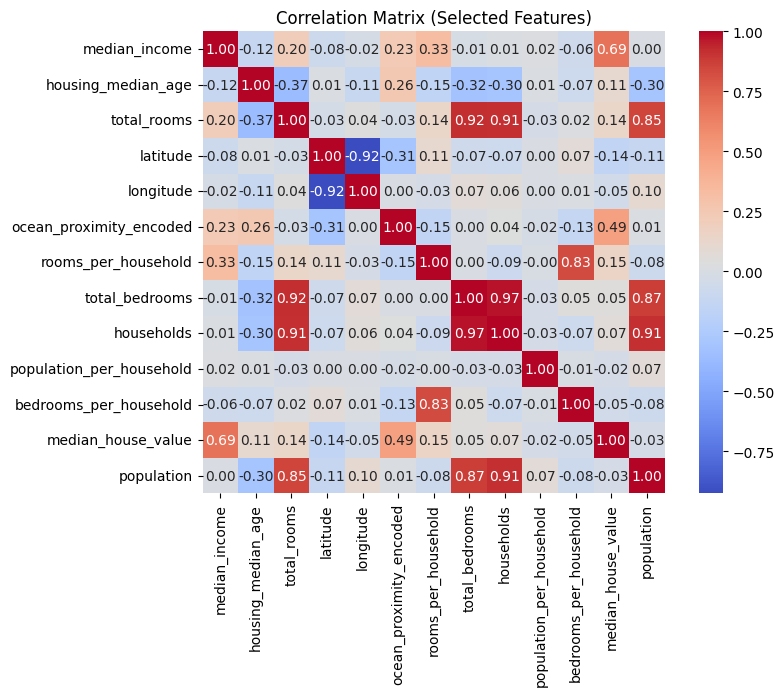

In [34]:
plt.figure(figsize=(9, 6))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix (Selected Features)")
plt.show()

In [35]:
df[['median_income', 'median_house_value']].describe()



median_income  median_house_value
count   20616.000000        20616.000000
mean    38705.461050       206845.317229
std     18992.203108       115403.502145
min      4999.000000        14999.000000
25%     25639.750000       119600.000000
50%     35348.000000       179700.000000
75%     47426.000000       264725.000000
max    150001.000000       500001.000000

In [36]:
import re

text = "Here is the link: https://lao.ca.gov/reports/2015/finance/housing-costs/housing-costs.aspx"

# Extract URL
link = re.findall(r'https?://\S+', text)

print(link[0])   # print the link only


https://lao.ca.gov/reports/2015/finance/housing-costs/housing-costs.aspx


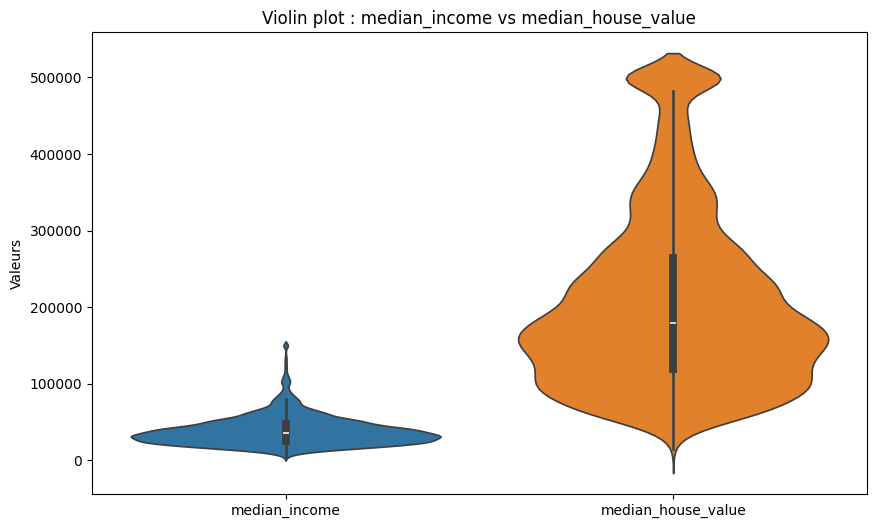

In [37]:

plt.figure(figsize=(10,6))
sns.violinplot(data=df[['median_income', 'median_house_value']], inner="box")  
# inner="box" ajoute le boxplot à l'intérieur du violon
plt.title("Violin plot : median_income vs median_house_value")
plt.ylabel("Valeurs")
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_19324\2479505851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='ocean_proximity', y='median_house_value', data=df, palette="Set2")


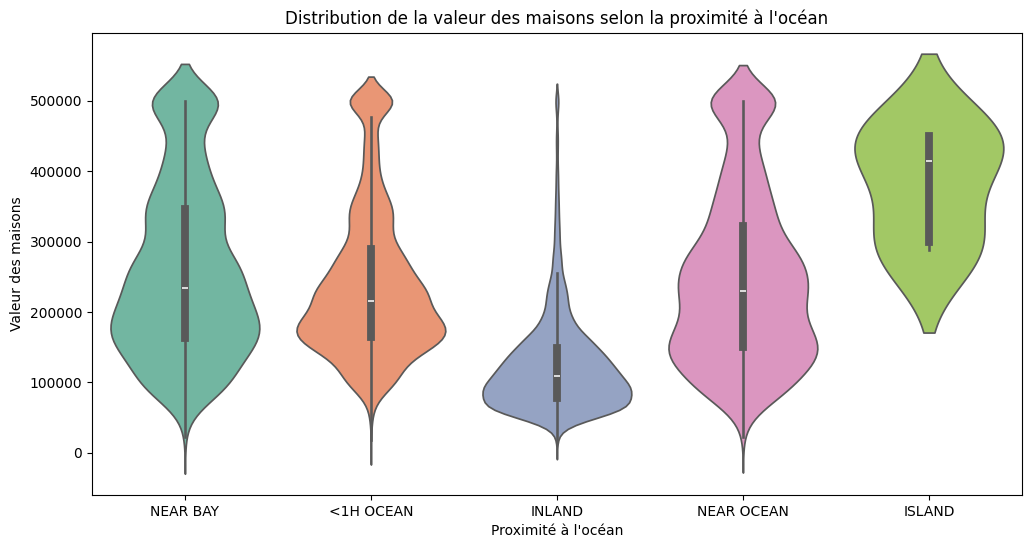

In [38]:
plt.figure(figsize=(12,6))
sns.violinplot(x='ocean_proximity', y='median_house_value', data=df, palette="Set2")
plt.title("Distribution de la valeur des maisons selon la proximité à l'océan")
plt.ylabel("Valeur des maisons")
plt.xlabel("Proximité à l'océan")
plt.show()


In [39]:
# Camabert de ocean_proximity

counts = df['ocean_proximity'].value_counts() # Compter le nombre d'occurrences de chaque catégorie
# Créer le pie chart
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title("Répartition de ocean_proximity")
plt.axis('equal')  # Pour que le cercle soit parfait
plt.legend()
plt.show()


In [40]:
print("Il y a", df['population'].mean()/df['households'].mean() ,"personnes par ménage en moyenne")
print("Il y a", df['total_bedrooms'].mean()/df['households'].mean() ,"chambres par foyer en moyenne")

Il y a 2.8517191933689805 personnes par ménage en moyenne
Il y a 1.0743705656385627 chambres par foyer en moyenne


In [41]:
# Quelles sont les plages géographiques pour chaque catégorie de proximité à l'océan ?
proximity_geo_ranges = df.groupby('ocean_proximity').agg({
    'latitude': ['min', 'max'],
    'longitude': ['min', 'max']
}).round(4)
print("Plages géographiques par proximité à l'océan :")
print(proximity_geo_ranges)


Plages géographiques par proximité à l'océan :
                latitude        longitude        
                     min    max       min     max
ocean_proximity                                  
<1H OCEAN          32.61  41.88   -124.14 -116.62
INLAND             32.64  41.95   -123.73 -114.31
ISLAND             33.33  33.43   -118.48 -118.32
NEAR BAY           37.35  38.34   -122.59 -122.01
NEAR OCEAN         32.54  41.95   -124.35 -116.97


In [42]:
# Quelles plages de revenu sont réalistes pour chaque type de proximité ?
income_by_proximity = df.groupby('ocean_proximity').agg({
    'median_income': ['min', 'max', 'mean', 'median']
}).round(2)
print("\nRépartition des revenus selon la proximité à l'océan :")
print(income_by_proximity)



Répartition des revenus selon la proximité à l'océan :
                median_income                             
                          min       max      mean   median
ocean_proximity                                           
<1H OCEAN              4999.0  150001.0  42309.57  38750.0
INLAND                 4999.0  150001.0  32084.19  29886.0
ISLAND                21579.0   33906.0  27444.20  27361.0
NEAR BAY               4999.0  150001.0  41738.80  38194.0
NEAR OCEAN             5360.0  150001.0  40044.18  36470.5


In [43]:
# Comment l'âge moyen des logements varie-t-il selon l'emplacement et la proximité à l'océan ?
age_patterns = df.groupby('ocean_proximity').agg({
    'housing_median_age': ['min', 'max', 'mean', 'median']
}).round(1)
print("\nTendances de l'âge des logements selon la proximité à l'océan :")
print(age_patterns)



Tendances de l'âge des logements selon la proximité à l'océan :
                housing_median_age                   
                               min   max  mean median
ocean_proximity                                      
<1H OCEAN                      2.0  52.0  29.3   30.0
INLAND                         1.0  52.0  24.3   23.0
ISLAND                        27.0  52.0  42.4   52.0
NEAR BAY                       2.0  52.0  37.7   39.0
NEAR OCEAN                     2.0  52.0  29.4   29.0


In [44]:
# Quels sont les ratios population/foyer réalistes ?
pop_household_stats = df.groupby('ocean_proximity').agg({
    'population_per_household': ['min', 'max', 'mean', 'median', 'std']
}).round(2)
print("\nStatistiques de la population par foyer :")
print(pop_household_stats)



Statistiques de la population par foyer :
                population_per_household                             
                                     min      max  mean median    std
ocean_proximity                                                      
<1H OCEAN                           1.07    41.21  3.05   2.94   0.94
INLAND                              1.06  1243.33  3.30   2.85  17.33
ISLAND                              2.13     2.55  2.38   2.44   0.19
NEAR BAY                            1.28    15.60  2.62   2.54   0.79
NEAR OCEAN                          1.22   502.46  2.95   2.62   9.75


In [45]:
# Statistiques de base pour chaque catégorie de proximité
proximity_stats = df.groupby('ocean_proximity').agg({
    'median_income': ['count', 'min', 'max', 'mean'],
    'households': ['min', 'max', 'mean'],
    'latitude': ['min', 'max'],
    'longitude': ['min', 'max'],
    'housing_median_age': ['min', 'max', 'mean']
}).round(2)

print("NIVEAU 1 - Aperçu par proximité à l'océan :")
z = pd.DataFrame(proximity_stats)
z

NIVEAU 1 - Aperçu par proximité à l'océan :


median_income                              households                 latitude        longitude         housing_median_age             
                        count      min       max      mean        min     max    mean      min    max       min     max                min   max   mean
ocean_proximity                                                                                                                                        
<1H OCEAN                9123   4999.0  150001.0  42309.57        4.0  3886.0  512.92    32.61  41.88   -124.14 -116.62                2.0  52.0  29.30
INLAND                   6543   4999.0  150001.0  32084.19        2.0  3933.0  475.69    32.64  41.95   -123.73 -114.31                1.0  52.0  24.28
ISLAND                      5  21579.0   33906.0  27444.20      160.0   431.0  276.60    33.33  33.43   -118.48 -118.32               27.0  52.0  42.40
NEAR BAY                 2289   4999.0  150001.0  41738.80        1.0  3589.0  488.80    37.35  38.34   -122.59 -122.01                2.0  52.0  37.73
NEAR OCEAN               2656   5360.0  150001.0  40044.18        3.0  4012.0  498.57    32.54  41.95   -124.35 -116.97                2.0  52.0  29.36

In [46]:
# Contraintes de revenu pour chaque proximité
income_constraints = df.groupby('ocean_proximity')['median_income'].agg([
    'min', 'max', 'mean', 'std'
]).round(2)

# Obtenir également les percentiles pour des plages réalistes
income_percentiles = df.groupby('ocean_proximity')['median_income'].agg([
    lambda x: x.quantile(0.05),  # 5e percentile
    lambda x: x.quantile(0.25),  # 25e percentile  
    lambda x: x.quantile(0.75),  # 75e percentile
    lambda x: x.quantile(0.95)   # 95e percentile
]).round(2)

income_percentiles.columns = ['p5', 'p25', 'p75', 'p95']
print("\nNIVEAU 2 - Plages de revenus selon la proximité à l'océan :")
print("Plages de base :")
print(income_constraints)
print("\nPlages par percentiles (bornes réalistes) :")
z = pd.DataFrame(income_percentiles)
z



NIVEAU 2 - Plages de revenus selon la proximité à l'océan :
Plages de base :
                     min       max      mean       std
ocean_proximity                                       
<1H OCEAN         4999.0  150001.0  42309.57  20012.44
INLAND            4999.0  150001.0  32084.19  14349.97
ISLAND           21579.0   33906.0  27444.20   4441.80
NEAR BAY          4999.0  150001.0  41738.80  20173.05
NEAR OCEAN        5360.0  150001.0  40044.18  20097.96

Plages par percentiles (bornes réalistes) :


p5      p25      p75      p95
ocean_proximity                                    
<1H OCEAN        17735.6  28649.5  51800.0  78424.1
INLAND           14241.9  21889.5  39611.0  57778.3
ISLAND           22471.6  26042.0  28333.0  32791.4
NEAR BAY         16501.6  28355.0  50551.0  79083.6
NEAR OCEAN       16433.5  26284.5  48358.0  76845.5

In [47]:
# Créer des catégories de revenus pour des contraintes plus précises
df['income_bin'] = pd.cut(df['median_income'], bins=5)

households_constraints = df.groupby(['ocean_proximity', 'income_bin'])['households'].agg([
    'min', 'max', 'mean', 'count'
]).round(2).reset_index()

print("\nNIVEAU 3 - Foyers par (Proximité + Revenu) :")
u = pd.DataFrame(households_constraints)
print(u)

# Alternative : Corrélation simple pour vérifier si cette complexité est nécessaire
corr_income_households = df.groupby('ocean_proximity')[['median_income', 'households']].corr().iloc[0::2, -1]
print("\nCorrélation entre Revenu et Foyers par proximité :")
z1 = pd.DataFrame(corr_income_households)




NIVEAU 3 - Foyers par (Proximité + Revenu) :
   ocean_proximity            income_bin    min     max    mean  count
0        <1H OCEAN   (4853.998, 33999.4]    6.0  3405.0  525.68   3520
1        <1H OCEAN    (33999.4, 62999.8]    5.0  3886.0  511.82   4495
2        <1H OCEAN    (62999.8, 92000.2]    4.0  3701.0  497.24    884
3        <1H OCEAN   (92000.2, 121000.6]   10.0  1511.0  432.11    156
4        <1H OCEAN  (121000.6, 150001.0]    4.0  1352.0  314.03     68
5           INLAND   (4853.998, 33999.4]    2.0  3933.0  444.50   4087
6           INLAND    (33999.4, 62999.8]    2.0  3832.0  533.48   2255
7           INLAND    (62999.8, 92000.2]    7.0  2397.0  483.20    179
8           INLAND   (92000.2, 121000.6]    6.0   540.0  257.13     15
9           INLAND  (121000.6, 150001.0]   18.0  1257.0  348.43      7
10          ISLAND   (4853.998, 33999.4]  160.0   431.0  276.60      5
11          ISLAND    (33999.4, 62999.8]    NaN     NaN     NaN      0
12          ISLAND    (62999.8,

C:\Users\USER\AppData\Local\Temp\ipykernel_19324\3842563193.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  households_constraints = df.groupby(['ocean_proximity', 'income_bin'])['households'].agg([


In [48]:
z1

households
ocean_proximity                          
<1H OCEAN       median_income   -0.041906
INLAND          median_income    0.094234
ISLAND          median_income    0.023268
NEAR BAY        median_income   -0.020501
NEAR OCEAN      median_income   -0.010561

In [49]:
# Contraintes géographiques basées sur les choix précédents
geo_constraints = df.groupby(['ocean_proximity']).agg({
    'latitude': ['min', 'max', 'mean'],
    'longitude': ['min', 'max', 'mean']
}).round(4)

print("\nNIVEAU 4 - Limites géographiques par proximité à l'océan :")
print(geo_constraints)

# Plus détaillé : Vérifier si le revenu influence l'emplacement à l'intérieur de chaque proximité
def analyze_geo_patterns(df, proximity_type):
    subset = df[df['ocean_proximity'] == proximity_type]
    print(f"\nTendances géographiques pour {proximity_type} :")
    print(f"Plage de latitude : {subset['latitude'].min():.4f} à {subset['latitude'].max():.4f}")
    print(f"Plage de longitude : {subset['longitude'].min():.4f} à {subset['longitude'].max():.4f}")
    
    # Vérifier si les zones à revenu élevé ont des emplacements différents
    high_income = subset[subset['median_income'] > subset['median_income'].median()]
    low_income = subset[subset['median_income'] <= subset['median_income'].median()]
    
    print(f"Zones à revenu élevé - Lat: {high_income['latitude'].mean():.4f}, Lon: {high_income['longitude'].mean():.4f}")
    print(f"Zones à revenu faible - Lat: {low_income['latitude'].mean():.4f}, Lon: {low_income['longitude'].mean():.4f}")

for proximity in df['ocean_proximity'].unique():
    analyze_geo_patterns(df, proximity)



NIVEAU 4 - Limites géographiques par proximité à l'océan :
                latitude                 longitude                  
                     min    max     mean       min     max      mean
ocean_proximity                                                     
<1H OCEAN          32.61  41.88  34.5606   -124.14 -116.62 -118.8478
INLAND             32.64  41.95  36.7316   -123.73 -114.31 -119.7327
ISLAND             33.33  33.43  33.3580   -118.48 -118.32 -118.3540
NEAR BAY           37.35  38.34  37.8009   -122.59 -122.01 -122.2607
NEAR OCEAN         32.54  41.95  34.7394   -124.35 -116.97 -119.3336

Tendances géographiques pour NEAR BAY :
Plage de latitude : 37.3500 à 38.3400
Plage de longitude : -122.5900 à -122.0100
Zones à revenu élevé - Lat: 37.7844, Lon: -122.2526
Zones à revenu faible - Lat: 37.8173, Lon: -122.2688

Tendances géographiques pour <1H OCEAN :
Plage de latitude : 32.6100 à 41.8800
Plage de longitude : -124.1400 à -116.6200
Zones à revenu élevé - Lat: 34.6256, L

In [50]:
# Contraintes d'âge des logements basées sur tous les facteurs précédents
age_constraints = df.groupby(['ocean_proximity']).agg({
    'housing_median_age': ['min', 'max', 'mean', 'std']
}).round(1)

print("\nNIVEAU 5 - Âge des logements par proximité à l'océan :")
print(age_constraints)

# Plus détaillé : Tendances de l'âge selon la proximité et le revenu
age_detailed = df.groupby(['ocean_proximity', pd.cut(df['median_income'], bins=3)])['housing_median_age'].agg([
    'min', 'max', 'mean', 'count'
]).round(1).reset_index()

print("\nTendances détaillées de l'âge (Proximité × Revenu) :")
print(age_detailed)



NIVEAU 5 - Âge des logements par proximité à l'océan :
                housing_median_age                  
                               min   max  mean   std
ocean_proximity                                     
<1H OCEAN                      2.0  52.0  29.3  11.6
INLAND                         1.0  52.0  24.3  12.0
ISLAND                        27.0  52.0  42.4  13.2
NEAR BAY                       2.0  52.0  37.7  13.1
NEAR OCEAN                     2.0  52.0  29.4  11.8

Tendances détaillées de l'âge (Proximité × Revenu) :
   ocean_proximity         median_income   min   max  mean  count
0        <1H OCEAN   (4853.998, 53333.0]   2.0  52.0  30.5   7055
1        <1H OCEAN   (53333.0, 101667.0]   2.0  52.0  24.8   1907
2        <1H OCEAN  (101667.0, 150001.0]   2.0  52.0  29.9    161
3           INLAND   (4853.998, 53333.0]   1.0  52.0  24.7   6049
4           INLAND   (53333.0, 101667.0]   2.0  52.0  18.9    476
5           INLAND  (101667.0, 150001.0]   3.0  45.0  20.4     18
6   

C:\Users\USER\AppData\Local\Temp\ipykernel_19324\2236485809.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_detailed = df.groupby(['ocean_proximity', pd.cut(df['median_income'], bins=3)])['housing_median_age'].agg([


In [51]:
# Contraintes d'âge des logements basées sur tous les facteurs précédents
age_constraints = df.groupby(['ocean_proximity']).agg({
    'housing_median_age': ['min', 'max', 'mean', 'std']
}).round(1)

print("\nNIVEAU 5 - Âge des logements par proximité à l'océan :")
print(age_constraints)

# Plus détaillé : Tendances de l'âge selon la proximité et le revenu
age_detailed = df.groupby(['ocean_proximity', pd.cut(df['median_income'], bins=3)])['housing_median_age'].agg([
    'min', 'max', 'mean', 'count'
]).round(1).reset_index()

print("\nTendances détaillées de l'âge (Proximité × Revenu) :")
print(age_detailed)



NIVEAU 5 - Âge des logements par proximité à l'océan :
                housing_median_age                  
                               min   max  mean   std
ocean_proximity                                     
<1H OCEAN                      2.0  52.0  29.3  11.6
INLAND                         1.0  52.0  24.3  12.0
ISLAND                        27.0  52.0  42.4  13.2
NEAR BAY                       2.0  52.0  37.7  13.1
NEAR OCEAN                     2.0  52.0  29.4  11.8

Tendances détaillées de l'âge (Proximité × Revenu) :
   ocean_proximity         median_income   min   max  mean  count
0        <1H OCEAN   (4853.998, 53333.0]   2.0  52.0  30.5   7055
1        <1H OCEAN   (53333.0, 101667.0]   2.0  52.0  24.8   1907
2        <1H OCEAN  (101667.0, 150001.0]   2.0  52.0  29.9    161
3           INLAND   (4853.998, 53333.0]   1.0  52.0  24.7   6049
4           INLAND   (53333.0, 101667.0]   2.0  52.0  18.9    476
5           INLAND  (101667.0, 150001.0]   3.0  45.0  20.4     18
6   

C:\Users\USER\AppData\Local\Temp\ipykernel_19324\2236485809.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_detailed = df.groupby(['ocean_proximity', pd.cut(df['median_income'], bins=3)])['housing_median_age'].agg([


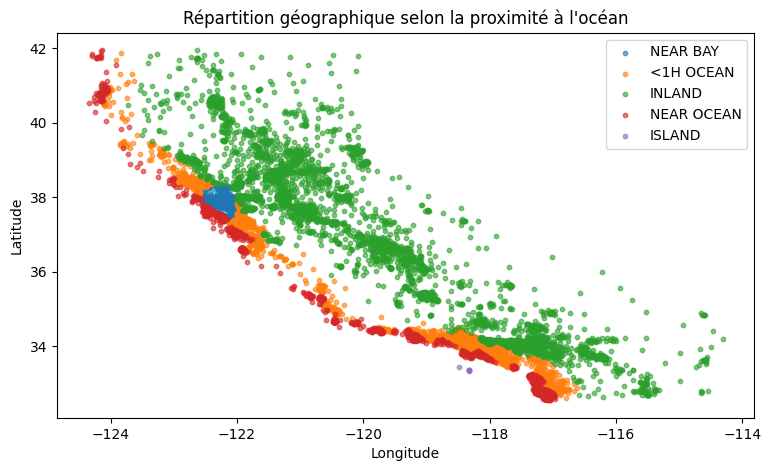

In [52]:
# Existe-t-il des clusters géographiques clairs pour chaque type de proximité ?
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
for proximity in df['ocean_proximity'].unique():
    subset = df[df['ocean_proximity'] == proximity]
    plt.scatter(subset['longitude'], subset['latitude'], 
                alpha=0.6, label=proximity, s=10)
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Répartition géographique selon la proximité à l\'océan')
plt.show()


In [53]:
# What are impossible combinations in the data?
def check_impossible_combinations(df):
    results = {}
    
    # Check if ISLAND has any inland-like coordinates
    island_data = df[df['ocean_proximity'] == 'ISLAND']
    results['island_count'] = len(island_data)
    results['island_lat_range'] = (island_data['latitude'].min(), island_data['latitude'].max())
    results['island_lon_range'] = (island_data['longitude'].min(), island_data['longitude'].max())
    
    # Check income vs proximity patterns
    for proximity in df['ocean_proximity'].unique():
        subset = df[df['ocean_proximity'] == proximity]
        results[f'{proximity}_income_range'] = (subset['median_income_USD'].min(), 
                                               subset['median_income_USD'].max())
    
    return results

constraint_analysis = check_impossible_combinations(df)
print("Constraint analysis:")
for key, value in constraint_analysis.items():
    print(f"{key}: {value}")

KeyError: 'median_income_USD'

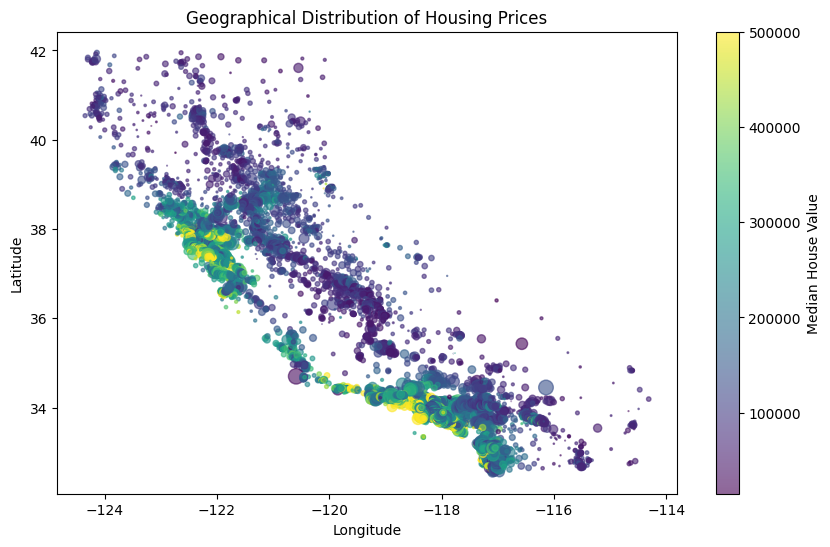

In [ ]:
# Scatter plot of housing locations colored by price
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['longitude'], df['latitude'], 
                     c=df['median_house_value'], 
                     cmap='viridis', alpha=0.6, 
                     s=df['population']/100)
plt.colorbar(scatter, label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Housing Prices')
plt.show()

# With ocean proximity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', 
                hue='ocean_proximity', alpha=0.6)
plt.title('Housing Locations by Ocean Proximity')
plt.show()

In [ ]:
# Interactive geographical plot (if using plotly)
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", 
                       color="median_house_value", size="population",
                       color_continuous_scale=px.colors.cyclical.IceFire, 
                       size_max=15, zoom=4,
                       mapbox_style="open-street-map",
                       title="California Housing Prices - Geographical Distribution")
fig.show()


plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16352\715065521.py:2: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



<Figure size 640x480 with 0 Axes>

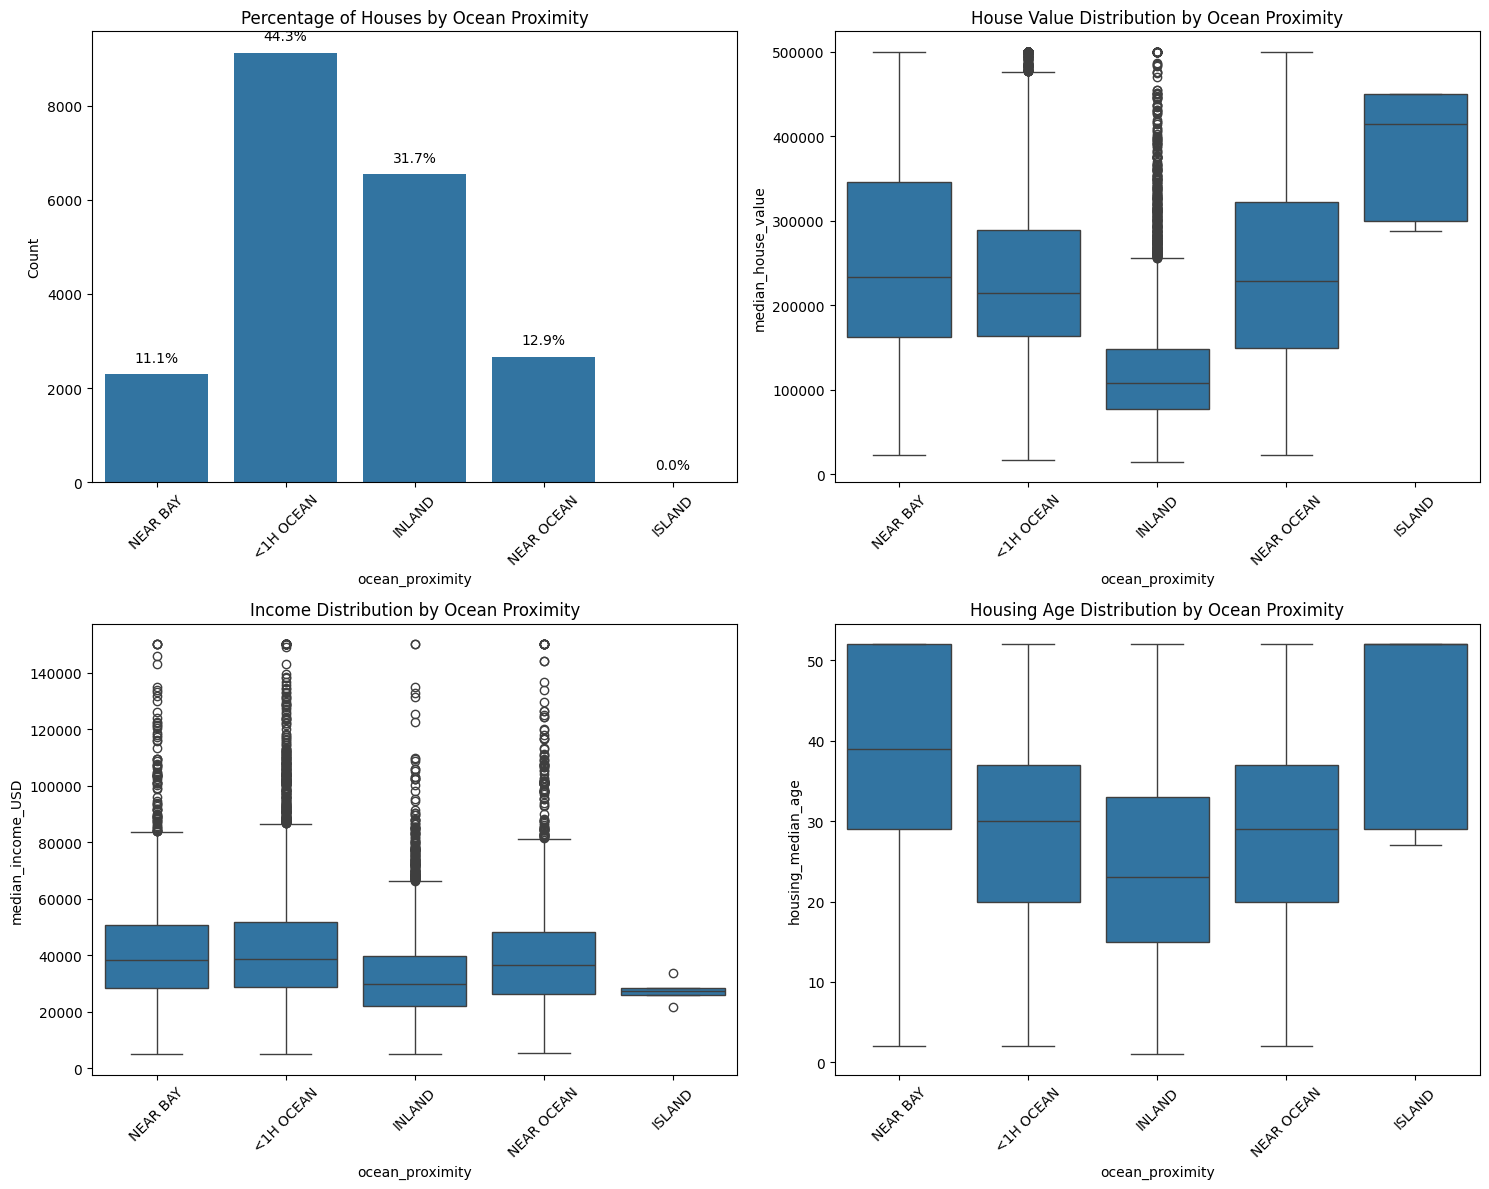

In [ ]:
# Ocean proximity analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Count plot with percentages on bars
ax = sns.countplot(data=df, x='ocean_proximity', ax=axes[0,0])

# Add percentages on top of bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.01 * total,
            f'{height/total:.1%}',
            ha='center', va='bottom')

axes[0,0].set_title('Percentage of Houses by Ocean Proximity')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)

# House value by ocean proximity
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value', ax=axes[0,1])
axes[0,1].set_title('House Value Distribution by Ocean Proximity')
axes[0,1].tick_params(axis='x', rotation=45)

# Income by ocean proximity
sns.boxplot(data=df, x='ocean_proximity', y='median_income_USD', ax=axes[1,0])
axes[1,0].set_title('Income Distribution by Ocean Proximity')
axes[1,0].tick_params(axis='x', rotation=45)

# Housing age by ocean proximity
sns.boxplot(data=df, x='ocean_proximity', y='housing_median_age', ax=axes[1,1])
axes[1,1].set_title('Housing Age Distribution by Ocean Proximity')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
target = "median_house_value"
features = ['ocean_proximity_encoded','median_income','total_bedrooms','housing_median_age','latitude','longitude','rooms_per_household']


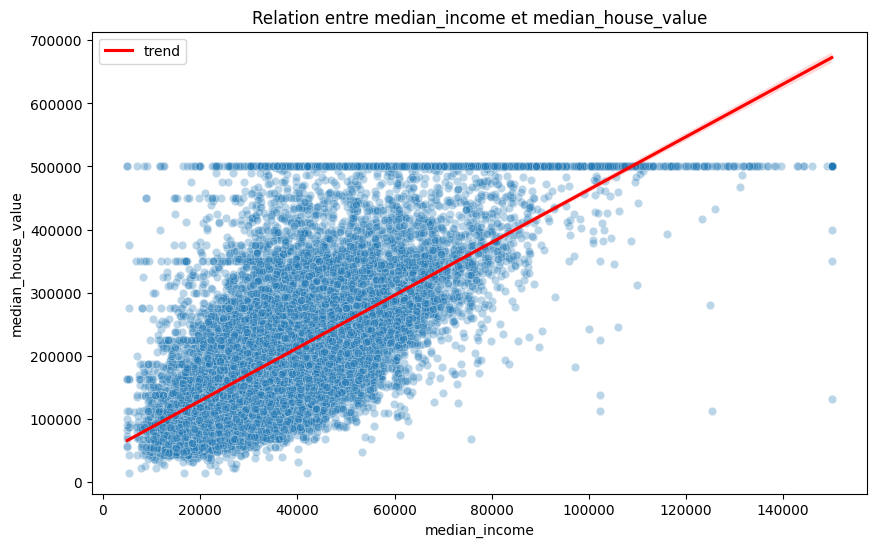

In [ ]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='median_income', y='median_house_value', alpha=0.3)
sns.regplot(data=df, x='median_income', y='median_house_value',
            scatter=False, color='red', label='trend')
plt.legend()
plt.title("Relation entre median_income et median_house_value")
plt.show()


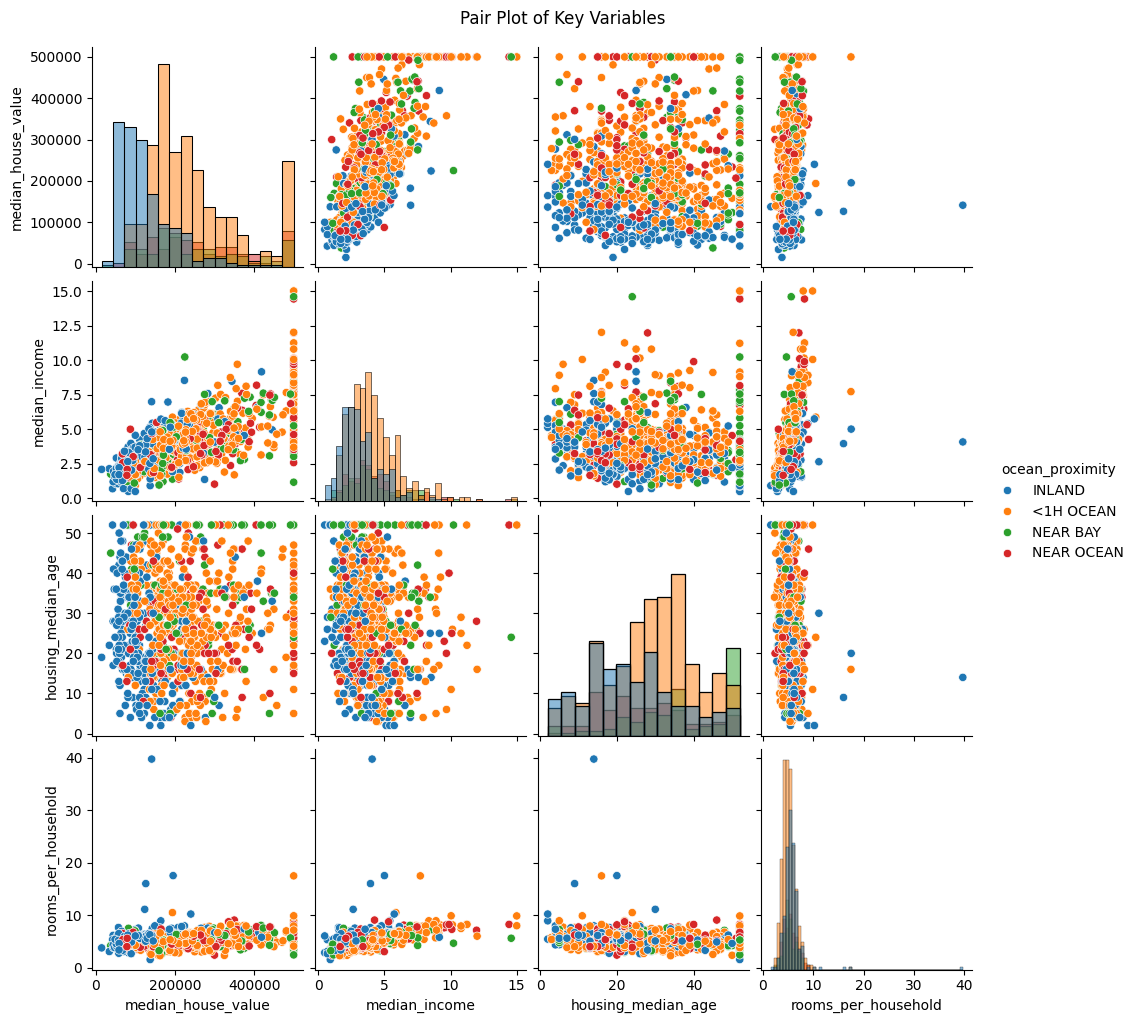

In [ ]:
# Pair plot for key variables (use sample for large datasets)
sample_df = df.sample(1000) if len(df) > 1000 else df
key_vars = ['median_house_value', 'median_income', 'housing_median_age', 
           'rooms_per_household', 'ocean_proximity']

sns.pairplot(sample_df[key_vars], hue='ocean_proximity', diag_kind='hist')
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

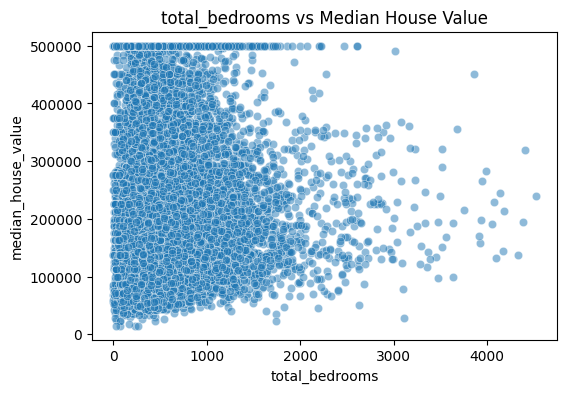

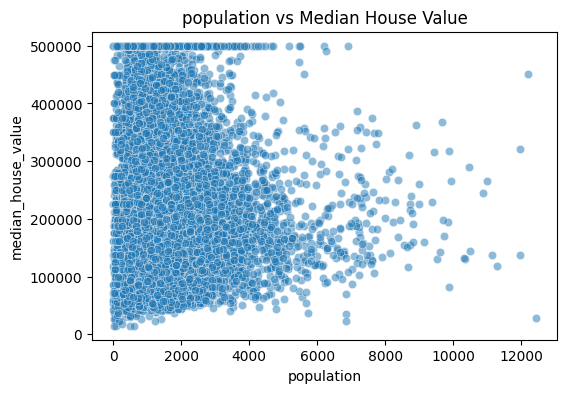

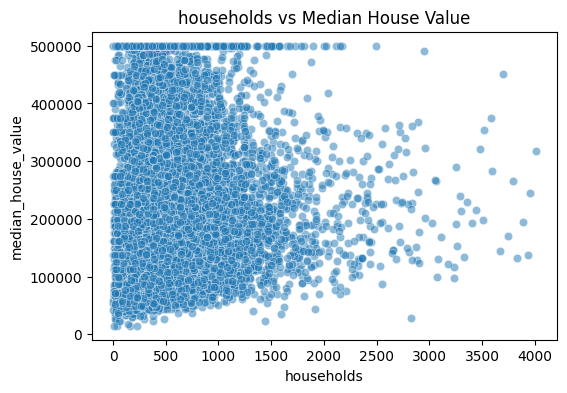

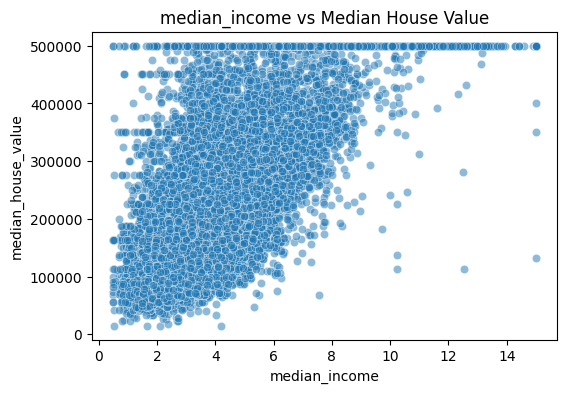

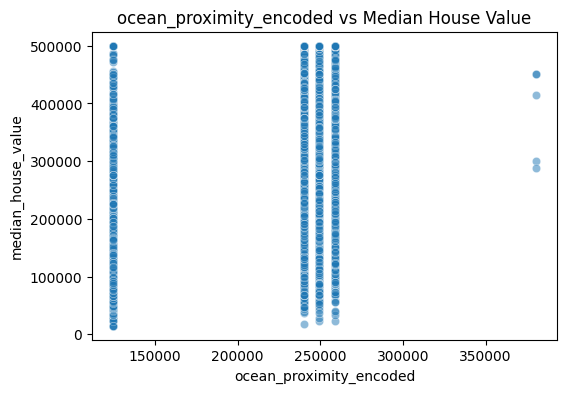

In [ ]:
# Features to compare with target
features = ['total_rooms', 'total_bedrooms',
            'population', 'households', 'median_income','ocean_proximity_encoded']

for col in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='median_house_value', alpha=0.5)
    plt.title(f'{col} vs Median House Value')
    plt.show()


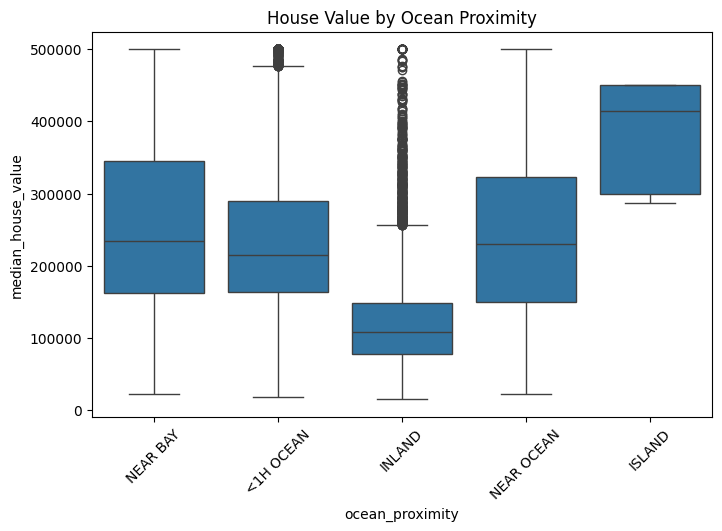

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value')
plt.xticks(rotation=45)
plt.title('House Value by Ocean Proximity')
plt.show()


In [ ]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_house_value ocean_proximity  \
0           322.0       126.0            452600.0        NEAR BAY   
1          2401.0      1138.0            358500.0        NEAR BAY   
2           496.0       177.0            352100.0        NEAR BAY   
3           558.0       219.0            341300.0        NEAR BAY   
4           565.0       259.0            342200.0        NEAR BAY   
...           ...         ...                 ...             ...   
20635       845.0       330.0             78100.0          INLAND   
20636       356.0       114.0             77100.0          INLAND   
20637      1007.0       433.0             92300.0          INLAND   
20638       741.0       349.0             84700.0          INLAND   
20639      1387.0       530.0             89400.0          INLAND   

      geographic_unit  ocean_proximity_encoded  rooms_per_household  \
0        census_block            259230.884229             6.984127   
1        census_block            259230.884229             6.238137   
2        census_block            259230.884229             8.288136   
3        census_block            259230.884229             5.817352   
4        census_block            259230.884229             6.281853   
...               ...                      ...                  ...   
20635    census_block            124804.082340             5.045455   
20636    census_block            124804.082340             6.114035   
20637    census_block            124804.082340             5.205543   
20638    census_block            124804.082340             5.329513   
20639    census_block            124804.082340             5.254717   

       population_per_household  bedrooms_per_household  median_income_USD  \
0                      2.555556                1.023810            83252.0   
1                      2.109842                0.971880            83014.0   
2                      2.802260                1.073446            72574.0   
3                      2.547945                1.073059            56431.0   
4                      2.181467                1.081081            38462.0   
...                         ...                     ...                ...   
20635                  2.560606                1.133333            15603.0   
20636                  3.122807                1.315789            25568.0   
20637                  2.325635                1.120092            17000.0   
20638                  2.123209                1.171920            18672.0   
20639                  2.616981                1.162264            23886.0   

                income_bin  
0       (62999.8, 92000.2]  
1       (62999.8, 92000.2]  
2       (62999.8, 92000.2]  
3       (33999.4, 62999.8]  
4       (33999.4, 62999.8]  
...                    ...  
20635  (4853.998, 33999.4]  
20636  (4853.998, 33999.4]  
20637  (4853.998, 33999.4]  
20638  (4853.998, 33999.4]  
20639  (4853.998, 33999.4]  

[20616 rows x 16 columns]

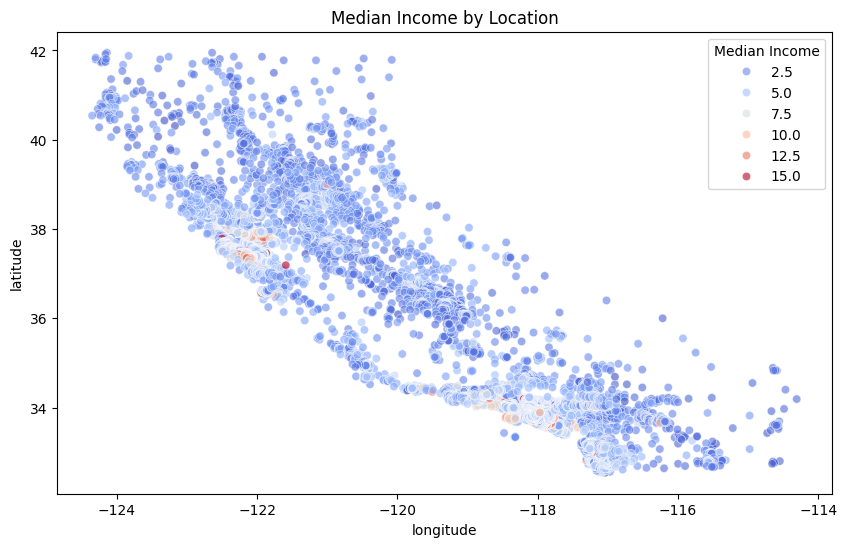

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude',
                hue='median_income', palette='coolwarm', alpha=0.6)
plt.title("Median Income by Location")
plt.legend(title='Median Income')
plt.show()


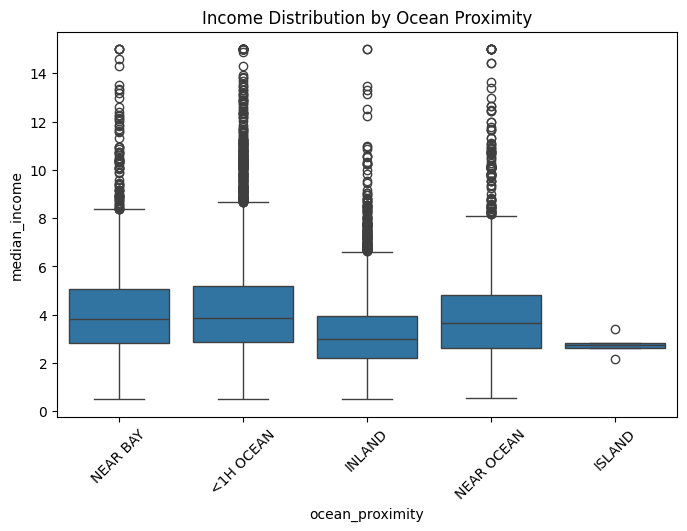

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='ocean_proximity', y='median_income')
plt.xticks(rotation=45)
plt.title("Income Distribution by Ocean Proximity")
plt.show()


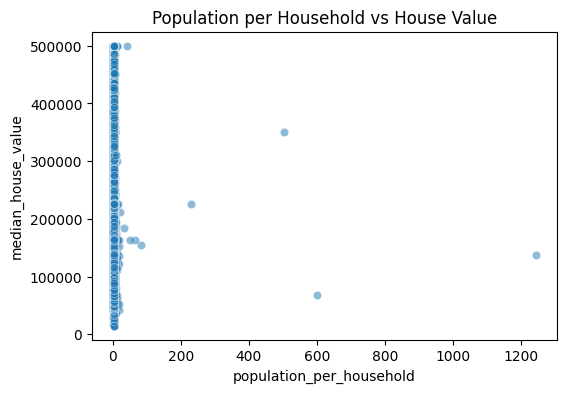

In [ ]:


plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='population_per_household', y='median_house_value', alpha=0.5)
plt.title("Population per Household vs House Value")
plt.show()


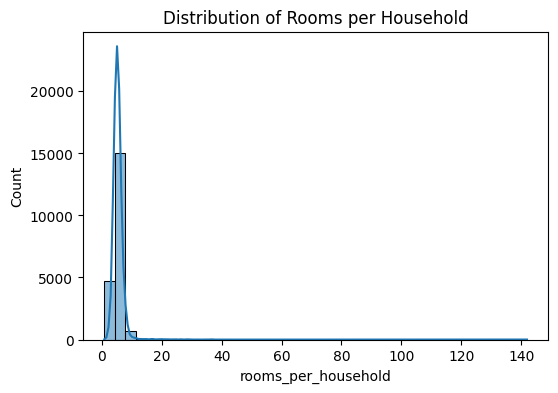

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['rooms_per_household'], bins=40, kde=True)
plt.title("Distribution of Rooms per Household")
plt.show()


In [ ]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x= "longitude",
    y= "latitude",
    z= "households",
    labels={"longitude": "longitude", "latitude": "latitude", "households": "household"},
    width=600,
    height=500,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()


In [ ]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat= "latitude",    
    lon= "longitude",
    width=600,  # Width of map
    height=600,  # Height of map
    color= "households",
    hover_data=["households"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map") 

fig.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16352\882423814.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



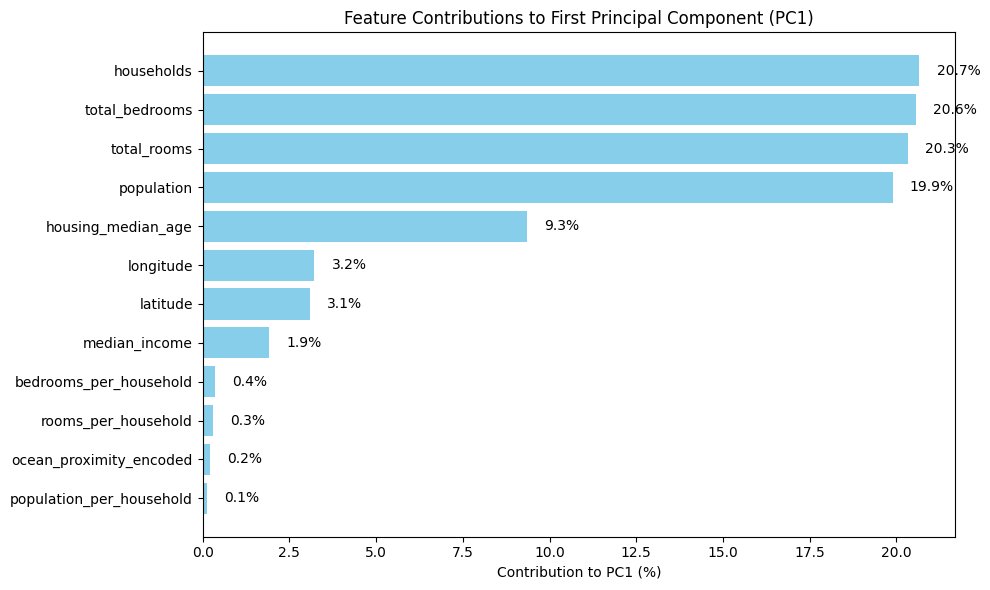

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Define features and target
cols = [
    'median_income',
    'housing_median_age',
    'total_rooms',
    'latitude',
    'longitude',
    'ocean_proximity_encoded',
    'rooms_per_household',
    'total_bedrooms',
    'households',
    'population_per_household',
    'bedrooms_per_household',
    'median_house_value',
    'population'
]

# X: Features (exclude target), y: Target
X = df[cols].drop(columns='median_house_value')
y = df['median_house_value']

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Step 3: Get the absolute loadings for PC1 and convert to percentages
pc1_loadings = np.abs(pca.components_[0])
percent_contributions = 100 * pc1_loadings / np.sum(pc1_loadings)

# Step 4: Create a Series for plotting
feature_percentages = pd.Series(percent_contributions, index=X.columns).sort_values()

# Step 5: Plot the horizontal bar chart with percentage labels
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_percentages.index, feature_percentages.values, color='skyblue')
plt.xlabel('Contribution to PC1 (%)')
plt.title('Feature Contributions to First Principal Component (PC1)')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', va='center')

plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'geographic_unit',
       'ocean_proximity_encoded', 'rooms_per_household',
       'population_per_household', 'bedrooms_per_household'],
      dtype='object')

## **IV.Feature Engineering**

#### Nous avons crée 4 variables :
 #### rooms_per_household
 #### population_per_household et 
 #### bedrooms_per_household
 #### ocean_proximity_encoded

In [ ]:
# --- 1. Définir les features et la target ---

from sklearn.model_selection import train_test_split
cols = [ 
    'median_income',
    'housing_median_age',
    'total_rooms',
    'latitude',
    'longitude',
    'ocean_proximity_encoded',
    'rooms_per_household',
    'total_bedrooms',
    'households',
    'population_per_household',
    'bedrooms_per_household',
    'population'
]

X = df[cols]
y = df["median_house_value"]

# --- 2. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#### **1.Feature Selection**


In [ ]:
# Feature Selection pour SVR avec SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR

# Sélection des 6 meilleures features selon f_regression
kbest = SelectKBest(score_func=f_regression, k=6)
kbest.fit(X_train, y_train)

X_train_kbest = kbest.transform(X_train)
X_test_kbest  = kbest.transform(X_test)

selected_features_kbest = X_train.columns[kbest.get_support()]
print("Features sélectionnées par SelectKBest :", list(selected_features_kbest))

# Entraîner SVR sur features sélectionnées
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_kbest, y_train)
y_pred_svr = svr_model.predict(X_test_kbest)


Features sélectionnées par SelectKBest : ['median_income', 'housing_median_age', 'total_rooms', 'latitude', 'ocean_proximity_encoded', 'rooms_per_household']


In [ ]:
# Feature Selection pour SVR avec RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Entraîner RandomForest pour évaluer l’importance
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Sélection automatique des features importantes (>2% importance)
sfm_rf = SelectFromModel(rf_model, threshold=0.02, prefit=True)
X_train_rf = sfm_rf.transform(X_train)
X_test_rf  = sfm_rf.transform(X_test)

selected_features_rf = X_train.columns[sfm_rf.get_support()]
print("Features sélectionnées par RandomForest :", list(selected_features_rf))

# Entraîner SVR sur features sélectionnées
svr_model_rf = SVR(kernel='rbf')
svr_model_rf.fit(X_train_rf, y_train)
y_pred_svr_rf = svr_model_rf.predict(X_test_rf)


c:\Users\USER\VENV\pythonDS\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\USER\VENV\pythonDS\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Features sélectionnées par RandomForest : ['median_income', 'housing_median_age', 'latitude', 'longitude', 'ocean_proximity_encoded', 'rooms_per_household', 'population_per_household', 'bedrooms_per_household']


In [ ]:
# Feature Selection avec XGBoost
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split


# Entraîner XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Feature selection automatique (>2% importance)
sfm = SelectFromModel(xgb_model, threshold=0.02, prefit=True)
X_train_xgb = sfm.transform(X_train)
X_test_xgb  = sfm.transform(X_test)

# Features retenues
selected_features_xgb = X_train.columns[sfm.get_support()]
print("Features sélectionnées par XGBoost :", list(selected_features_xgb))


Features sélectionnées par XGBoost : ['median_income', 'housing_median_age', 'latitude', 'longitude', 'ocean_proximity_encoded', 'population_per_household']


c:\Users\USER\VENV\pythonDS\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\USER\VENV\pythonDS\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



#### **2.Feature importance**

**Feature Imporance avec xgboost**

                     Feature  Importance  Importance (%)
0    ocean_proximity_encoded    0.457314       45.731392
1              median_income    0.274076       27.407579
2   population_per_household    0.084217        8.421694
3                  longitude    0.041087        4.108654
4                   latitude    0.035133        3.513334
5         housing_median_age    0.030875        3.087494
6        rooms_per_household    0.017429        1.742937
7             total_bedrooms    0.013443        1.344287
8     bedrooms_per_household    0.013000        1.300047
9                total_rooms    0.012015        1.201505
10                households    0.011523        1.152340
11                population    0.009887        0.988732


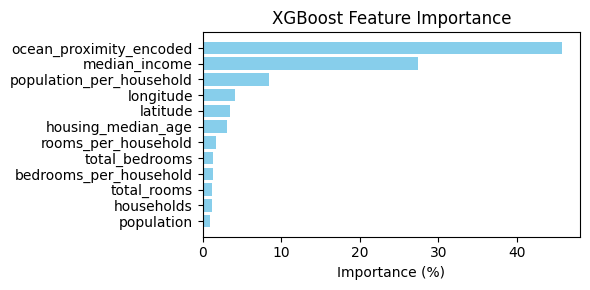

In [ ]:

# Train XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Get raw importances
importances = model.feature_importances_

# Convert to DataFrame with percentages
importance_df = pd.DataFrame({
    'Feature': cols,
    'Importance': importances
})
importance_df['Importance (%)'] = 100 * importance_df['Importance'] / importance_df['Importance'].sum()

# Sort by importance
importance_df = importance_df.sort_values(by='Importance (%)', ascending=False).reset_index(drop=True)

# Display
print(importance_df)

# Plot
plt.figure(figsize=(6, 3))
plt.barh(importance_df['Feature'], importance_df['Importance (%)'], color='skyblue')
plt.xlabel('Importance (%)')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Highest importance at top
plt.tight_layout()
plt.show()


**Feature Imporance avec SVR**

                     Feature   Importance  Importance (%)
0          median_income_USD  8332.188771       31.305340
1    ocean_proximity_encoded  7296.100815       27.412595
2                   latitude  1924.767299        7.231653
3                total_rooms  1839.334575        6.910668
4        rooms_per_household  1756.842422        6.600733
5                 households  1085.108177        4.076922
6         housing_median_age  1063.517686        3.995803
7                  longitude   970.064857        3.644686
8     bedrooms_per_household   876.187729        3.291975
9             total_bedrooms   768.992484        2.889225
10  population_per_household   372.444711        1.399333
11                population   330.321065        1.241068


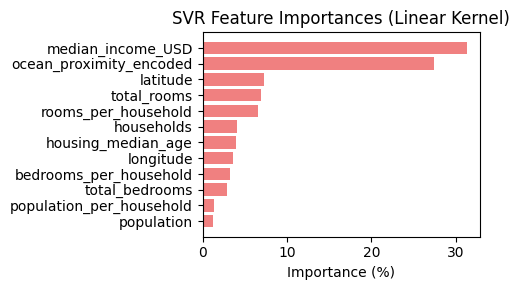

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

target = 'median_house_value'
X = df[cols]
y = df[target]

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Train SVR with linear kernel
svr = SVR(kernel='linear')
svr.fit(X_train_sc, y_train)

# Get absolute coefficients as importance
coefs = np.abs(svr.coef_.ravel())

# Convert to percentage
importance_df = pd.DataFrame({
    'Feature': cols,
    'Importance': coefs,
})
importance_df['Importance (%)'] = 100 * importance_df['Importance'] / importance_df['Importance'].sum()
importance_df = importance_df.sort_values(by='Importance (%)', ascending=False).reset_index(drop=True)
print(importance_df)
# Plot
plt.figure(figsize=(5, 3))
plt.barh(importance_df['Feature'], importance_df['Importance (%)'], color='lightcoral')
plt.xlabel('Importance (%)')
plt.title('SVR Feature Importances (Linear Kernel)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**Feature Imporance de confirmation avec Random Forest**

                     Feature  Importance  Importance (%)
0              median_income    0.473998       47.399758
1    ocean_proximity_encoded    0.145756       14.575633
2   population_per_household    0.119783       11.978308
3                  longitude    0.058035        5.803477
4                   latitude    0.057105        5.710480
5         housing_median_age    0.044084        4.408446
6        rooms_per_household    0.030676        3.067630
7     bedrooms_per_household    0.023161        2.316059
8                total_rooms    0.013284        1.328421
9             total_bedrooms    0.012071        1.207055
10                population    0.011514        1.151420
11                households    0.010533        1.053314


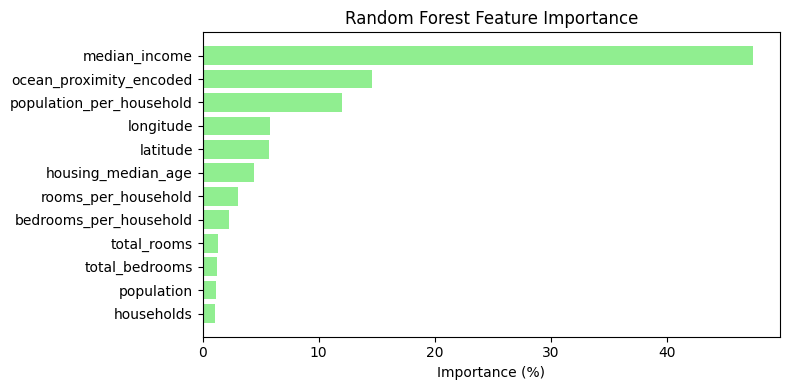

In [ ]:

from sklearn.ensemble import RandomForestRegressor

# --- 3. Créer et entraîner le modèle RandomForest ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# --- 4. Récupérer les importances des features ---
importances = rf.feature_importances_

# --- 5. Créer DataFrame pour visualisation ---
importance_df = pd.DataFrame({
    'Feature': cols,
    'Importance': importances
})

# Convertir en pourcentage
importance_df['Importance (%)'] = 100 * importance_df['Importance'] / importance_df['Importance'].sum()

# Trier par importance
importance_df = importance_df.sort_values(by='Importance (%)', ascending=False).reset_index(drop=True)

# Afficher
print(importance_df)

# --- 6. Graphique horizontal ---
plt.figure(figsize=(8, 4))
plt.barh(importance_df['Feature'], importance_df['Importance (%)'], color='lightgreen')
plt.xlabel('Importance (%)')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Importance la plus élevée en haut
plt.tight_layout()
plt.show()



In [ ]:
# PIB par états au USA

print("https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP")

https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP


## **V.Construction du modèle**

#### **1.Modèle XGBOOST REGRESSOR**

In [ ]:

cols = [
    'ocean_proximity_encoded',
    'median_income',
    'population_per_household',
    'longitude',
    'latitude', # total bedrooms
    'housing_median_age',
    'rooms_per_household'
]

X = df[cols]
y = df["median_house_value"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    StandardScaler(),  # helps XGB with features on different scales
    XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        tree_method='hist',
        verbosity=0
    )
)

params = {
    'xgbregressor__n_estimators': [100, 200],
    'xgbregressor__max_depth': [3, 5, 7],
    'xgbregressor__learning_rate': [0.01, 0.1],
    'xgbregressor__subsample': [0.8, 1],
    'xgbregressor__colsample_bytree': [0.8, 1],
    'xgbregressor__reg_alpha': [0, 0.1, 1],     # L1 regularization
    'xgbregressor__reg_lambda': [1, 10, 50],    # L2 regularization
}


In [ ]:
import joblib

# Charger le modèle déjà entraîné
model1xgboostreg = joblib.load('model1xgboostreg.pkl')

# Faire les prédictions directement
y_pred = model1xgboostreg.predict(X_test)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     feature_weights=None,
                                                     gamma=Non...
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbregressor__colsample_bytree': [0.8, 1],
                         'xgbregressor__learning_rate': [0.01, 0.1],
                         'xgbregressor__max_depth': [3, 5, 7],
                         'xgbregressor__n_estimators': [100, 200],
                         'xgbregressor__reg_alpha': [0, 0.1, 1],
                         'xgbregressor__reg_lambda': [1, 10, 50],
                         'xgbregressor__subsample': [0.8, 1]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    def metrics(y_true, y_pred):
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        return rmse, mae, r2, mape,

    train_rmse, train_mae, train_r2, train_mape = metrics(y_train, y_train_pred)
    test_rmse, test_mae, test_r2, test_mape = metrics(y_test, y_test_pred)

    print("--- Performance TRAIN ---")
    print(f"R²: {train_r2:.4f}")
    print(f"RMSE: {train_rmse:,.2f} $")
    print(f"MAE: {train_mae:,.2f} $")
    print(f"MAPE: {train_mape:.2f} %")

    print("\n--- Performance TEST ---")
    print(f"R²: {test_r2:.4f}")
    print(f"RMSE: {test_rmse:,.2f} $")
    print(f"MAE: {test_mae:,.2f} $")
    print(f"MAPE: {test_mape:.2f} %")

# Evaluate best model
evaluate_model(grid.best_estimator_, X_train, y_train, X_test, y_test)


--- Performance TRAIN ---
R²: 0.9289
RMSE: 30,711.54 $
MAE: 20,641.06 $
MAPE: 11.59 %

--- Performance TEST ---
R²: 0.8586
RMSE: 43,588.05 $
MAE: 28,633.10 $
MAPE: 16.20 %


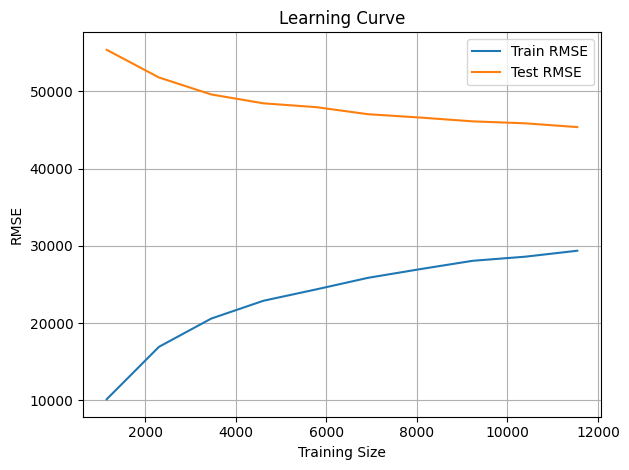

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    grid.best_estimator_, X_train, y_train,
    cv=5, scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

plt.plot(train_sizes, -np.mean(train_scores, axis=1), label="Train RMSE")
plt.plot(train_sizes, -np.mean(test_scores, axis=1), label="Test RMSE")
plt.xlabel("Training Size")
plt.ylabel("RMSE")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### **2.SVR modèle de prédiction**

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib  # For saving the model

# *1 Feature selection and train-test split
features = ['median_income', 'ocean_proximity_encoded','latitude','longitude','population_per_household','housing_median_age',]
target = 'median_house_value'
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# *2 Standardization
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# *3 Apply log1p transform to target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Charger le modèle SVR déjà entraîné
import joblib
svr_log_model = joblib.load('svr_log_model.pkl')


# *6 Predict and inverse log transform
y_train_pred_log = random_search.predict(X_train_sc)
y_train_pred = np.expm1(y_train_pred_log)

y_test_pred_log = random_search.predict(X_test_sc)
y_test_pred = np.expm1(y_test_pred_log)


# *8 Save model (Optional)
joblib.dump(random_search.best_estimator_, 'svr_log_model.pkl')


Fitting 3 folds for each of 30 candidates, totalling 90 fits


['svr_log_model.pkl']

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prédictions sur train (après log transformation)
y_train_pred_log = random_search.predict(X_train_sc)
y_train_pred = np.expm1(y_train_pred_log)  # inverse log transform

# Prédictions sur test
y_test_pred_log = random_search.predict(X_test_sc)
y_test_pred = np.expm1(y_test_pred_log)


In [ ]:
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


In [ ]:
def adjusted_r2(r2, n, p):
    # n = nombre d'échantillons, p = nombre de features
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
n_train, n_test = X_train.shape[0], X_test.shape[0]
p = X_train.shape[1]

# Train metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_rmsle = rmsle(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_adj_r2 = adjusted_r2(train_r2, n_train, p)

# Test metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_rmsle = rmsle(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_adj_r2 = adjusted_r2(test_r2, n_test, p)

# MAPE (Mean Absolute Percentage Error)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

train_mape = mape(y_train, y_train_pred)
test_mape = mape(y_test, y_test_pred)

# Baseline MAE : prédire la moyenne sur test et train
baseline_train_mae = mean_absolute_error(y_train, np.full_like(y_train, y_train.mean()))
baseline_test_mae = mean_absolute_error(y_test, np.full_like(y_test, y_train.mean()))


In [ ]:
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train RMSLE: {train_rmsle:.4f}")
print(f"Test RMSLE: {test_rmsle:.4f}")
print(f"Train R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")
print(f"Train Adjusted R2: {train_adj_r2:.4f}")
print(f"Test Adjusted R2: {test_adj_r2:.4f}")
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Baseline Train MAE (predict mean): {baseline_train_mae:.2f}")
print(f"Baseline Test MAE (predict mean): {baseline_test_mae:.2f}")


Train MAE: 38698.33
Test MAE: 39187.92
Train RMSE: 57869.35
Test RMSE: 58630.63
Train RMSLE: 0.2669
Test RMSLE: 0.2722
Train R2: 0.7480
Test R2: 0.7440
Train Adjusted R2: 0.7479
Test Adjusted R2: 0.7437
Train MAPE: 19.85%
Test MAPE: 20.38%
Baseline Train MAE (predict mean): 91210.15
Baseline Test MAE (predict mean): 91481.15


X_train_sc shape: (16492, 6)
y_train_log shape: (16492,)


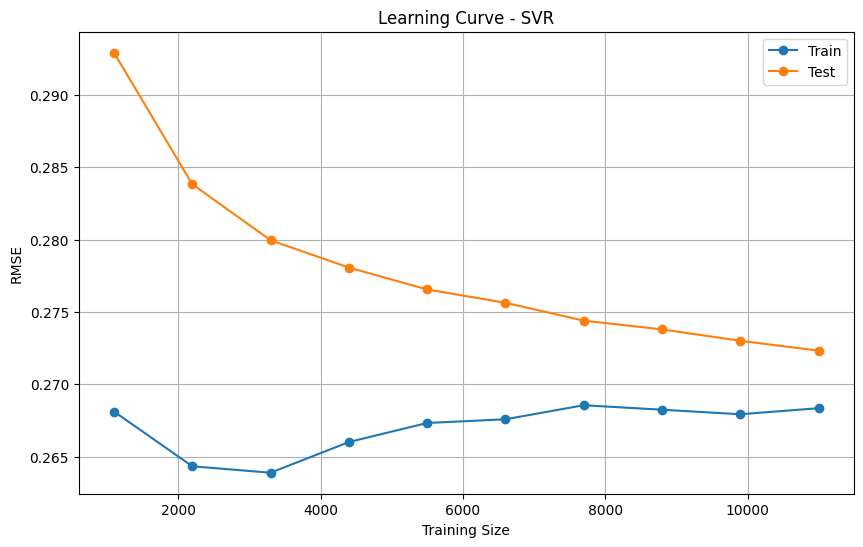

In [ ]:
# Check shapes
print(f"X_train_sc shape: {X_train_sc.shape}")
print(f"y_train_log shape: {y_train_log.shape}")

# Fix the data - use the same number of samples
min_samples = min(X_train_sc.shape[0], len(y_train_log))
X_train_sc_fixed = X_train_sc[:min_samples]
y_train_log_fixed = y_train_log[:min_samples]

# Learning curve with fixed data
train_sizes, train_scores, test_scores = learning_curve(
    random_search.best_estimator_, X_train_sc_fixed, y_train_log_fixed,
    cv=3, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_root_mean_squared_error'
)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Train')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Test')
plt.xlabel('Training Size')
plt.ylabel('RMSE')
plt.title('Learning Curve - SVR')
plt.legend()
plt.grid(True)
plt.show()

## **VI.Optimisation du meilleure modele**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle

# Colonnes utilisées par le modèle
cols = ['median_income', 'ocean_proximity_encoded', 'rooms_per_household',
        'latitude', 'longitude','housing_median_age', 'population_per_household']

# Charger les données
X = df[cols]
y = df['median_house_value']

# Train/test split (identique à ton entraînement original)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Log transform du target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# -------------------------------
# 🔥 Charger le modèle déjà entraîné
# -------------------------------
with open("xgboost_house_price_model.pkl", "rb") as f:
    final_pipeline = pickle.load(f)

print("Model loaded successfully!")

# -------------------------------
# 🔥 Prédictions
# -------------------------------
y_train_pred_log = final_pipeline.predict(X_train)
y_test_pred_log = final_pipeline.predict(X_test)

y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)

print("Predictions computed!")


[I 2025-12-03 09:06:17,502] A new study created in memory with name: no-name-3dbebf8b-e1a2-4327-bf3f-1da2b22f4370


Starting Bayesian optimization with Optuna...


  0%|          | 0/50 [00:00<?, ?it/s]

Best trial: 0. Best value: -0.252733:   2%|▏         | 1/50 [00:06<05:01,  6.15s/it]

[I 2025-12-03 09:06:23,650] Trial 0 finished with value: -0.25273288728275567 and parameters: {'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'reg_alpha': 2.5348407664333426e-07, 'reg_lambda': 3.809220577048033e-08, 'min_child_weight': 9, 'gamma': 3.005575058716044}. Best is trial 0 with value: -0.25273288728275567.


Best trial: 0. Best value: -0.252733:   4%|▍         | 2/50 [00:07<02:27,  3.07s/it]

[I 2025-12-03 09:06:24,558] Trial 1 finished with value: -0.2653647544741774 and parameters: {'n_estimators': 383, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'reg_alpha': 4.329370014459266e-07, 'reg_lambda': 6.8240955406304e-07, 'min_child_weight': 4, 'gamma': 2.6237821581611893}. Best is trial 0 with value: -0.25273288728275567.


Best trial: 2. Best value: -0.24908:   6%|▌         | 3/50 [00:07<01:35,  2.03s/it] 

[I 2025-12-03 09:06:25,356] Trial 2 finished with value: -0.2490799448706542 and parameters: {'n_estimators': 273, 'max_depth': 4, 'learning_rate': 0.08012737503998542, 'subsample': 0.6557975442608167, 'colsample_bytree': 0.7168578594140873, 'reg_alpha': 1.9826980964985924e-05, 'reg_lambda': 0.0003636636071695854, 'min_child_weight': 8, 'gamma': 0.9983689107917987}. Best is trial 2 with value: -0.2490799448706542.


Best trial: 2. Best value: -0.24908:   8%|▊         | 4/50 [00:09<01:17,  1.69s/it]

[I 2025-12-03 09:06:26,525] Trial 3 finished with value: -0.26881851743514185 and parameters: {'n_estimators': 306, 'max_depth': 6, 'learning_rate': 0.011711509955524094, 'subsample': 0.8430179407605753, 'colsample_bytree': 0.6682096494749166, 'reg_alpha': 3.850031979199519e-08, 'reg_lambda': 30.821613670416532, 'min_child_weight': 10, 'gamma': 4.041986740582305}. Best is trial 2 with value: -0.2490799448706542.


Best trial: 2. Best value: -0.24908:  10%|█         | 5/50 [00:09<00:58,  1.29s/it]

[I 2025-12-03 09:06:27,108] Trial 4 finished with value: -0.2579340681425081 and parameters: {'n_estimators': 222, 'max_depth': 3, 'learning_rate': 0.1024932221692416, 'subsample': 0.7760609974958406, 'colsample_bytree': 0.6488152939379115, 'reg_alpha': 0.00028614897264046574, 'reg_lambda': 2.2074212100007785e-08, 'min_child_weight': 10, 'gamma': 1.2938999080000846}. Best is trial 2 with value: -0.2490799448706542.


Best trial: 2. Best value: -0.24908:  12%|█▏        | 6/50 [00:11<01:04,  1.46s/it]

[I 2025-12-03 09:06:28,886] Trial 5 finished with value: -0.27338371968745007 and parameters: {'n_estimators': 365, 'max_depth': 4, 'learning_rate': 0.05864129169696527, 'subsample': 0.8186841117373118, 'colsample_bytree': 0.6739417822102108, 'reg_alpha': 5.324289357128436, 'reg_lambda': 0.5640638061927871, 'min_child_weight': 10, 'gamma': 4.474136752138244}. Best is trial 2 with value: -0.2490799448706542.


Best trial: 2. Best value: -0.24908:  14%|█▍        | 7/50 [00:13<01:13,  1.72s/it]

[I 2025-12-03 09:06:31,145] Trial 6 finished with value: -0.2632095734056568 and parameters: {'n_estimators': 339, 'max_depth': 8, 'learning_rate': 0.01351182947645082, 'subsample': 0.6783931449676581, 'colsample_bytree': 0.6180909155642152, 'reg_alpha': 8.471746987003668e-06, 'reg_lambda': 7.705004503489671e-05, 'min_child_weight': 3, 'gamma': 4.143687545759647}. Best is trial 2 with value: -0.2490799448706542.


Best trial: 2. Best value: -0.24908:  16%|█▌        | 8/50 [00:14<00:58,  1.38s/it]

[I 2025-12-03 09:06:31,814] Trial 7 finished with value: -0.2548987693534489 and parameters: {'n_estimators': 243, 'max_depth': 4, 'learning_rate': 0.06333268775321843, 'subsample': 0.6563696899899051, 'colsample_bytree': 0.9208787923016158, 'reg_alpha': 4.6876566400928895e-08, 'reg_lambda': 73.9382838287635, 'min_child_weight': 8, 'gamma': 0.993578407670862}. Best is trial 2 with value: -0.2490799448706542.


Best trial: 2. Best value: -0.24908:  18%|█▊        | 9/50 [00:14<00:43,  1.05s/it]

[I 2025-12-03 09:06:32,143] Trial 8 finished with value: -0.26453697138429916 and parameters: {'n_estimators': 102, 'max_depth': 7, 'learning_rate': 0.11069143219393454, 'subsample': 0.8916028672163949, 'colsample_bytree': 0.9085081386743783, 'reg_alpha': 4.638759594322625e-08, 'reg_lambda': 3.842884090673403e-05, 'min_child_weight': 2, 'gamma': 4.315517129377968}. Best is trial 2 with value: -0.2490799448706542.


Best trial: 2. Best value: -0.24908:  20%|██        | 10/50 [00:15<00:42,  1.07s/it]

[I 2025-12-03 09:06:33,261] Trial 9 finished with value: -0.26370692544123925 and parameters: {'n_estimators': 349, 'max_depth': 4, 'learning_rate': 0.012413189635294229, 'subsample': 0.7243929286862649, 'colsample_bytree': 0.7300733288106989, 'reg_alpha': 0.036851536911881845, 'reg_lambda': 0.023745138854603057, 'min_child_weight': 9, 'gamma': 2.3610746258097466}. Best is trial 2 with value: -0.2490799448706542.


Best trial: 10. Best value: -0.229476:  22%|██▏       | 11/50 [00:18<00:56,  1.46s/it]

[I 2025-12-03 09:06:35,594] Trial 10 finished with value: -0.22947611897253806 and parameters: {'n_estimators': 478, 'max_depth': 5, 'learning_rate': 0.02847748683027988, 'subsample': 0.6071847502459279, 'colsample_bytree': 0.8010124870699186, 'reg_alpha': 0.0004910184318953803, 'reg_lambda': 0.00332624713395538, 'min_child_weight': 6, 'gamma': 0.19953767859742422}. Best is trial 10 with value: -0.22947611897253806.


Best trial: 11. Best value: -0.228291:  24%|██▍       | 12/50 [00:20<01:08,  1.79s/it]

[I 2025-12-03 09:06:38,152] Trial 11 finished with value: -0.22829105911834086 and parameters: {'n_estimators': 499, 'max_depth': 5, 'learning_rate': 0.0262209763647716, 'subsample': 0.6097132653988919, 'colsample_bytree': 0.8142497056141959, 'reg_alpha': 0.00021730362290175328, 'reg_lambda': 0.00445647362006087, 'min_child_weight': 6, 'gamma': 0.02337640770715016}. Best is trial 11 with value: -0.22829105911834086.


Best trial: 12. Best value: -0.222351:  26%|██▌       | 13/50 [00:22<01:12,  1.96s/it]

[I 2025-12-03 09:06:40,497] Trial 12 finished with value: -0.22235063644767106 and parameters: {'n_estimators': 487, 'max_depth': 6, 'learning_rate': 0.026588373306819242, 'subsample': 0.6050785532559382, 'colsample_bytree': 0.8374709757162002, 'reg_alpha': 0.007483948702276168, 'reg_lambda': 0.018898592147144712, 'min_child_weight': 5, 'gamma': 0.015536082439507685}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  28%|██▊       | 14/50 [00:25<01:18,  2.18s/it]

[I 2025-12-03 09:06:43,180] Trial 13 finished with value: -0.2227050624111408 and parameters: {'n_estimators': 499, 'max_depth': 6, 'learning_rate': 0.027730138923026955, 'subsample': 0.600751750127807, 'colsample_bytree': 0.828710827199778, 'reg_alpha': 0.03360924651786867, 'reg_lambda': 0.14690781686069587, 'min_child_weight': 6, 'gamma': 0.09146016839237003}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  30%|███       | 15/50 [00:26<01:04,  1.84s/it]

[I 2025-12-03 09:06:44,229] Trial 14 finished with value: -0.2500980144175874 and parameters: {'n_estimators': 430, 'max_depth': 6, 'learning_rate': 0.03303317666846783, 'subsample': 0.9984067957444853, 'colsample_bytree': 0.8589085318772743, 'reg_alpha': 0.058146131126624576, 'reg_lambda': 0.39379450643619207, 'min_child_weight': 5, 'gamma': 1.7327571074264245}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  32%|███▏      | 16/50 [00:28<01:01,  1.80s/it]

[I 2025-12-03 09:06:45,953] Trial 15 finished with value: -0.23432615013233987 and parameters: {'n_estimators': 438, 'max_depth': 7, 'learning_rate': 0.020416574717800128, 'subsample': 0.7495910822966338, 'colsample_bytree': 0.8646061692551642, 'reg_alpha': 0.04461279476695133, 'reg_lambda': 0.1795208632395439, 'min_child_weight': 1, 'gamma': 0.5852091494153224}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  34%|███▍      | 17/50 [00:29<00:52,  1.58s/it]

[I 2025-12-03 09:06:47,015] Trial 16 finished with value: -0.25182425156160193 and parameters: {'n_estimators': 429, 'max_depth': 7, 'learning_rate': 0.04045991637278989, 'subsample': 0.712106345254307, 'colsample_bytree': 0.9542892386155918, 'reg_alpha': 1.5860397607353276, 'reg_lambda': 3.683100324328079, 'min_child_weight': 5, 'gamma': 1.7919514239527095}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  36%|███▌      | 18/50 [00:30<00:43,  1.37s/it]

[I 2025-12-03 09:06:47,904] Trial 17 finished with value: -0.244101664113213 and parameters: {'n_estimators': 185, 'max_depth': 6, 'learning_rate': 0.01880304962765749, 'subsample': 0.6203426693015723, 'colsample_bytree': 0.7541938292846557, 'reg_alpha': 0.0038372042201795077, 'reg_lambda': 0.034442618275370825, 'min_child_weight': 7, 'gamma': 0.5574248417963363}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  38%|███▊      | 19/50 [00:31<00:39,  1.26s/it]

[I 2025-12-03 09:06:48,914] Trial 18 finished with value: -0.25230120348907964 and parameters: {'n_estimators': 473, 'max_depth': 5, 'learning_rate': 0.04319982780287542, 'subsample': 0.660387229837571, 'colsample_bytree': 0.8416634198004797, 'reg_alpha': 0.2765704642444961, 'reg_lambda': 5.488608775886005, 'min_child_weight': 4, 'gamma': 1.5911106985764367}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  40%|████      | 20/50 [00:32<00:36,  1.21s/it]

[I 2025-12-03 09:06:49,996] Trial 19 finished with value: -0.25858600446064106 and parameters: {'n_estimators': 405, 'max_depth': 7, 'learning_rate': 0.018959563558938845, 'subsample': 0.6990733898150178, 'colsample_bytree': 0.7640881690357239, 'reg_alpha': 0.0034176739243631502, 'reg_lambda': 5.466789821598222e-06, 'min_child_weight': 7, 'gamma': 3.104308621160251}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  42%|████▏     | 21/50 [00:33<00:31,  1.09s/it]

[I 2025-12-03 09:06:50,824] Trial 20 finished with value: -0.2701806997711045 and parameters: {'n_estimators': 451, 'max_depth': 6, 'learning_rate': 0.18590112816357693, 'subsample': 0.7527125493395843, 'colsample_bytree': 0.9969456418305289, 'reg_alpha': 0.004756351653682824, 'reg_lambda': 0.04295949027032238, 'min_child_weight': 4, 'gamma': 4.969213925248543}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  44%|████▍     | 22/50 [00:35<00:35,  1.27s/it]

[I 2025-12-03 09:06:52,521] Trial 21 finished with value: -0.22747227154121727 and parameters: {'n_estimators': 496, 'max_depth': 5, 'learning_rate': 0.028384751942895418, 'subsample': 0.6118400287738414, 'colsample_bytree': 0.8096183749033755, 'reg_alpha': 0.00040874744041911876, 'reg_lambda': 0.00311431553575317, 'min_child_weight': 6, 'gamma': 0.04396160748333051}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  46%|████▌     | 23/50 [00:36<00:33,  1.26s/it]

[I 2025-12-03 09:06:53,741] Trial 22 finished with value: -0.23337004460571667 and parameters: {'n_estimators': 495, 'max_depth': 5, 'learning_rate': 0.04398189955114846, 'subsample': 0.6361727598918965, 'colsample_bytree': 0.8243614684535332, 'reg_alpha': 1.5755370432733493e-05, 'reg_lambda': 0.0017385746949413145, 'min_child_weight': 7, 'gamma': 0.35321557171028983}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  48%|████▊     | 24/50 [00:37<00:32,  1.25s/it]

[I 2025-12-03 09:06:54,977] Trial 23 finished with value: -0.24098390937278333 and parameters: {'n_estimators': 401, 'max_depth': 6, 'learning_rate': 0.02434148859977524, 'subsample': 0.6073248792362045, 'colsample_bytree': 0.8828129964146413, 'reg_alpha': 0.0014216529825891082, 'reg_lambda': 0.00017947862817293018, 'min_child_weight': 6, 'gamma': 0.8368579535290231}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  50%|█████     | 25/50 [00:39<00:34,  1.36s/it]

[I 2025-12-03 09:06:56,597] Trial 24 finished with value: -0.23593921330728787 and parameters: {'n_estimators': 451, 'max_depth': 5, 'learning_rate': 0.015747022107002084, 'subsample': 0.691328950058189, 'colsample_bytree': 0.7755355073953193, 'reg_alpha': 0.17850452518469853, 'reg_lambda': 0.009614563840963267, 'min_child_weight': 5, 'gamma': 0.0702711812997438}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  52%|█████▏    | 26/50 [00:40<00:33,  1.38s/it]

[I 2025-12-03 09:06:58,032] Trial 25 finished with value: -0.23577663779867594 and parameters: {'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.034334024509747825, 'subsample': 0.6426647906003815, 'colsample_bytree': 0.7848439579334285, 'reg_alpha': 6.950691327601266e-05, 'reg_lambda': 2.728217416966174, 'min_child_weight': 3, 'gamma': 0.5526807551899235}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  54%|█████▍    | 27/50 [00:41<00:31,  1.37s/it]

[I 2025-12-03 09:06:59,381] Trial 26 finished with value: -0.24279030075821573 and parameters: {'n_estimators': 465, 'max_depth': 7, 'learning_rate': 0.02400552081273106, 'subsample': 0.602188924832451, 'colsample_bytree': 0.8924603294392176, 'reg_alpha': 0.017342572384832954, 'reg_lambda': 0.10856729871287134, 'min_child_weight': 6, 'gamma': 1.1159078185167515}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  56%|█████▌    | 28/50 [00:43<00:30,  1.39s/it]

[I 2025-12-03 09:07:00,798] Trial 27 finished with value: -0.22243291690707387 and parameters: {'n_estimators': 414, 'max_depth': 5, 'learning_rate': 0.05361909087802703, 'subsample': 0.6709477637679032, 'colsample_bytree': 0.8355654496253273, 'reg_alpha': 0.3636265430680565, 'reg_lambda': 0.0004670202417683652, 'min_child_weight': 7, 'gamma': 0.03340857637924826}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  58%|█████▊    | 29/50 [00:44<00:26,  1.25s/it]

[I 2025-12-03 09:07:01,727] Trial 28 finished with value: -0.24930896900714586 and parameters: {'n_estimators': 408, 'max_depth': 6, 'learning_rate': 0.05309169008508396, 'subsample': 0.6750748503992984, 'colsample_bytree': 0.9400913330899168, 'reg_alpha': 0.44545853660254664, 'reg_lambda': 9.406055145490592e-06, 'min_child_weight': 8, 'gamma': 1.4794027039463944}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  60%|██████    | 30/50 [00:44<00:21,  1.10s/it]

[I 2025-12-03 09:07:02,463] Trial 29 finished with value: -0.25666342011594184 and parameters: {'n_estimators': 318, 'max_depth': 8, 'learning_rate': 0.07897089806003053, 'subsample': 0.63813170638782, 'colsample_bytree': 0.8482928770949325, 'reg_alpha': 6.0890551600069545, 'reg_lambda': 0.00034851128792089207, 'min_child_weight': 9, 'gamma': 2.06391357420115}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  62%|██████▏   | 31/50 [00:45<00:18,  1.01it/s]

[I 2025-12-03 09:07:03,194] Trial 30 finished with value: -0.260134332227603 and parameters: {'n_estimators': 381, 'max_depth': 5, 'learning_rate': 0.15684092915310582, 'subsample': 0.7340508610504257, 'colsample_bytree': 0.8348571316231008, 'reg_alpha': 1.077301960533736, 'reg_lambda': 1.7884373814248845e-07, 'min_child_weight': 7, 'gamma': 3.3145343221688606}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  64%|██████▍   | 32/50 [00:47<00:21,  1.19s/it]

[I 2025-12-03 09:07:04,862] Trial 31 finished with value: -0.22607091354171827 and parameters: {'n_estimators': 471, 'max_depth': 5, 'learning_rate': 0.034441057250057125, 'subsample': 0.6322892533963961, 'colsample_bytree': 0.8086847846452863, 'reg_alpha': 0.011693479872873745, 'reg_lambda': 0.001651027012808287, 'min_child_weight': 5, 'gamma': 0.006073632914005235}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  66%|██████▌   | 33/50 [00:48<00:20,  1.22s/it]

[I 2025-12-03 09:07:06,161] Trial 32 finished with value: -0.24094643455708015 and parameters: {'n_estimators': 464, 'max_depth': 4, 'learning_rate': 0.03633156699195381, 'subsample': 0.635017144822288, 'colsample_bytree': 0.8771443914449716, 'reg_alpha': 0.012139009303543988, 'reg_lambda': 0.0006828132655293392, 'min_child_weight': 5, 'gamma': 0.4834186835759115}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  68%|██████▊   | 34/50 [00:49<00:18,  1.19s/it]

[I 2025-12-03 09:07:07,258] Trial 33 finished with value: -0.24164636623746016 and parameters: {'n_estimators': 423, 'max_depth': 5, 'learning_rate': 0.04939679906847288, 'subsample': 0.6743802773049932, 'colsample_bytree': 0.7276577472662068, 'reg_alpha': 0.076528607917458, 'reg_lambda': 0.012063586881473036, 'min_child_weight': 4, 'gamma': 0.7557129700740309}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  70%|███████   | 35/50 [00:51<00:18,  1.21s/it]

[I 2025-12-03 09:07:08,512] Trial 34 finished with value: -0.2311925828355291 and parameters: {'n_estimators': 474, 'max_depth': 6, 'learning_rate': 0.07703228400692048, 'subsample': 0.6367795807919181, 'colsample_bytree': 0.7911103049891823, 'reg_alpha': 0.9815512121771192, 'reg_lambda': 3.4708038531611035e-05, 'min_child_weight': 3, 'gamma': 0.3305690304798743}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  72%|███████▏  | 36/50 [00:52<00:16,  1.17s/it]

[I 2025-12-03 09:07:09,602] Trial 35 finished with value: -0.2578220483941769 and parameters: {'n_estimators': 453, 'max_depth': 3, 'learning_rate': 0.06788992551461011, 'subsample': 0.8649243849802012, 'colsample_bytree': 0.8284158057697291, 'reg_alpha': 0.013771569684777139, 'reg_lambda': 0.000994943316943708, 'min_child_weight': 4, 'gamma': 1.2403125684432363}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  74%|███████▍  | 37/50 [00:53<00:16,  1.25s/it]

[I 2025-12-03 09:07:11,042] Trial 36 finished with value: -0.23934860739418845 and parameters: {'n_estimators': 279, 'max_depth': 6, 'learning_rate': 0.03136388629888752, 'subsample': 0.6969376028678201, 'colsample_bytree': 0.7067677378319025, 'reg_alpha': 0.0013209778498442478, 'reg_lambda': 0.9543649097557929, 'min_child_weight': 8, 'gamma': 0.7616131292807875}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  76%|███████▌  | 38/50 [00:56<00:21,  1.80s/it]

[I 2025-12-03 09:07:14,119] Trial 37 finished with value: -0.2485906624216013 and parameters: {'n_estimators': 386, 'max_depth': 5, 'learning_rate': 0.01032955887046757, 'subsample': 0.656977121228572, 'colsample_bytree': 0.7451000612375436, 'reg_alpha': 3.2987339894883063e-06, 'reg_lambda': 1.8680590944894212e-06, 'min_child_weight': 5, 'gamma': 0.3101181755037272}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  78%|███████▊  | 39/50 [00:59<00:24,  2.19s/it]

[I 2025-12-03 09:07:17,231] Trial 38 finished with value: -0.24582419343657502 and parameters: {'n_estimators': 480, 'max_depth': 4, 'learning_rate': 0.015156840861155738, 'subsample': 0.7937777848973289, 'colsample_bytree': 0.8666721172953356, 'reg_alpha': 0.16134755189934277, 'reg_lambda': 0.08656887042302364, 'min_child_weight': 7, 'gamma': 0.001264425925122519}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  80%|████████  | 40/50 [01:01<00:21,  2.19s/it]

[I 2025-12-03 09:07:19,431] Trial 39 finished with value: -0.26942506908545616 and parameters: {'n_estimators': 444, 'max_depth': 4, 'learning_rate': 0.02214177376671881, 'subsample': 0.6305451220738346, 'colsample_bytree': 0.8969312545364932, 'reg_alpha': 8.828882108232032e-05, 'reg_lambda': 9.12507295660387e-05, 'min_child_weight': 6, 'gamma': 3.582531132464836}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  82%|████████▏ | 41/50 [01:02<00:16,  1.83s/it]

[I 2025-12-03 09:07:20,425] Trial 40 finished with value: -0.2559137906214556 and parameters: {'n_estimators': 361, 'max_depth': 3, 'learning_rate': 0.2974053007288462, 'subsample': 0.6650610751466626, 'colsample_bytree': 0.8018746706419216, 'reg_alpha': 2.812931299866499, 'reg_lambda': 0.013957563261936427, 'min_child_weight': 8, 'gamma': 0.938236999976088}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  84%|████████▍ | 42/50 [01:05<00:16,  2.12s/it]

[I 2025-12-03 09:07:23,203] Trial 41 finished with value: -0.23090664232382951 and parameters: {'n_estimators': 486, 'max_depth': 5, 'learning_rate': 0.028531922662490168, 'subsample': 0.6174946030553115, 'colsample_bytree': 0.8115981650434319, 'reg_alpha': 0.0009647091291896017, 'reg_lambda': 0.0037557892680736013, 'min_child_weight': 6, 'gamma': 0.23207576571840888}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  86%|████████▌ | 43/50 [01:08<00:16,  2.38s/it]

[I 2025-12-03 09:07:26,209] Trial 42 finished with value: -0.2245309639769289 and parameters: {'n_estimators': 499, 'max_depth': 5, 'learning_rate': 0.038337487361232644, 'subsample': 0.6508314381700364, 'colsample_bytree': 0.7788505610183708, 'reg_alpha': 0.006211438071172187, 'reg_lambda': 0.0004985033999054968, 'min_child_weight': 5, 'gamma': 0.03782387117106027}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  88%|████████▊ | 44/50 [01:10<00:13,  2.26s/it]

[I 2025-12-03 09:07:28,187] Trial 43 finished with value: -0.23740727799803246 and parameters: {'n_estimators': 461, 'max_depth': 6, 'learning_rate': 0.03966986018594444, 'subsample': 0.6471534889335055, 'colsample_bytree': 0.7661990764379841, 'reg_alpha': 0.008292377598994895, 'reg_lambda': 0.0004031783909033437, 'min_child_weight': 5, 'gamma': 0.6833798426095868}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  90%|█████████ | 45/50 [01:11<00:09,  1.93s/it]

[I 2025-12-03 09:07:29,345] Trial 44 finished with value: -0.23448474295380461 and parameters: {'n_estimators': 419, 'max_depth': 5, 'learning_rate': 0.09616412467389862, 'subsample': 0.6776301009595035, 'colsample_bytree': 0.8451651561079695, 'reg_alpha': 0.024494135408843896, 'reg_lambda': 2.212492680946104e-05, 'min_child_weight': 4, 'gamma': 0.39940992042871937}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  92%|█████████▏| 46/50 [01:12<00:06,  1.52s/it]

[I 2025-12-03 09:07:29,895] Trial 45 finished with value: -0.2526574922256879 and parameters: {'n_estimators': 202, 'max_depth': 6, 'learning_rate': 0.05869425443025851, 'subsample': 0.959251095852884, 'colsample_bytree': 0.7860003501429779, 'reg_alpha': 0.11889729369759483, 'reg_lambda': 0.00012958882868249112, 'min_child_weight': 5, 'gamma': 2.569846227012578}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  94%|█████████▍| 47/50 [01:12<00:03,  1.24s/it]

[I 2025-12-03 09:07:30,498] Trial 46 finished with value: -0.23611044809058726 and parameters: {'n_estimators': 148, 'max_depth': 5, 'learning_rate': 0.051478504045682744, 'subsample': 0.7132222670872959, 'colsample_bytree': 0.614316728017922, 'reg_alpha': 0.49424816804955324, 'reg_lambda': 0.0011897200583101718, 'min_child_weight': 7, 'gamma': 0.16280690711860493}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  96%|█████████▌| 48/50 [01:14<00:02,  1.19s/it]

[I 2025-12-03 09:07:31,567] Trial 47 finished with value: -0.2512249626595936 and parameters: {'n_estimators': 479, 'max_depth': 4, 'learning_rate': 0.03662295617356871, 'subsample': 0.8252523496757213, 'colsample_bytree': 0.6430665877040956, 'reg_alpha': 0.038458962829935904, 'reg_lambda': 0.2864192903516936, 'min_child_weight': 3, 'gamma': 1.117865103074641}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351:  98%|█████████▊| 49/50 [01:15<00:01,  1.22s/it]

[I 2025-12-03 09:07:32,847] Trial 48 finished with value: -0.23347251137878966 and parameters: {'n_estimators': 433, 'max_depth': 7, 'learning_rate': 0.04638437471455179, 'subsample': 0.623998423325354, 'colsample_bytree': 0.9174310865584341, 'reg_alpha': 0.002652457137454245, 'reg_lambda': 0.007026927444894194, 'min_child_weight': 2, 'gamma': 0.49651810001839763}. Best is trial 12 with value: -0.22235063644767106.


Best trial: 12. Best value: -0.222351: 100%|██████████| 50/50 [01:17<00:00,  1.56s/it]


[I 2025-12-03 09:07:35,281] Trial 49 finished with value: -0.22949430798678888 and parameters: {'n_estimators': 484, 'max_depth': 6, 'learning_rate': 0.01714264285258895, 'subsample': 0.6016756583247947, 'colsample_bytree': 0.7068445814389477, 'reg_alpha': 0.006537685592044422, 'reg_lambda': 0.04563159607506357, 'min_child_weight': 4, 'gamma': 0.2083931376190828}. Best is trial 12 with value: -0.22235063644767106.

Best trial:
  Value (RMSE): 0.2224
  Params: 
    n_estimators: 487
    max_depth: 6
    learning_rate: 0.026588373306819242
    subsample: 0.6050785532559382
    colsample_bytree: 0.8374709757162002
    reg_alpha: 0.007483948702276168
    reg_lambda: 0.018898592147144712
    min_child_weight: 5
    gamma: 0.015536082439507685


--- Performance TRAIN ---
R²: 0.8830
RMSE: 39,395.81 $
MAE: 25,474.00 $
MAPE: 12.82 %
RMSLE: 0.1764


--- Performance TEST ---
R²: 0.8463
RMSE: 45,438.94 $
MAE: 29,470.89 $
MAPE: 15.54 %
RMSLE: 0.2147

--- Overfitting Analysis ---
RMSE gap (Train-Tes

In [ ]:
# Evaluate metrics function with RMSLE
def evaluate(y_true, y_pred, dataset="TEST"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    # Calculate RMSLE
    y_true_log = np.log1p(np.maximum(y_true, 0))
    y_pred_log = np.log1p(np.maximum(y_pred, 0))
    rmsle = np.sqrt(mean_squared_error(y_true_log, y_pred_log))

    print(f"--- Performance {dataset.upper()} ---")
    print(f"R²: {r2:.4f}")
    print(f"RMSE: {rmse:,.2f} $")
    print(f"MAE: {mae:,.2f} $")
    print(f"MAPE: {mape:.2f} %")
    print(f"RMSLE: {rmsle:.4f}")

# Test evaluation
evaluate(np.expm1(y_test_log), y_test_pred, dataset="TEST")

--- Performance TEST ---
R²: 0.8463
RMSE: 45,438.94 $
MAE: 29,470.89 $
MAPE: 15.54 %
RMSLE: 0.2147


In [ ]:
import pickle

# Save the model pipeline
with open('xgboost_house_price_model.pkl', 'wb') as f:
    pickle.dump(final_pipeline, f)

print("\n✅ Model saved as 'xgboost_house_price_model.pkl'")



✅ Model saved as 'xgboost_house_price_model.pkl'


In [ ]:

from sklearn.model_selection import learning_curve
import os
import joblib

# Load saved model
final_pipeline = joblib.load('xgboost_house_price_model.pkl')

# Make sure plot output is shown in the notebook
%matplotlib inline

# Create folder to save plots for Streamlit
os.makedirs("plots", exist_ok=True)

# 1. Predict using loaded model
y_train_pred_log = final_pipeline.predict(X_train)
y_test_pred_log = final_pipeline.predict(X_test)

# Inverse log1p transform to get predictions in original scale
y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)

# 2. Predicted vs Actual (Test Set)
plt.figure(figsize=(6, 6))
sns.scatterplot(x=np.expm1(y_test_log), y=y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/predicted_vs_actual.png")
plt.show()

# 3. Residual Distribution (Train vs Test)
train_residuals = np.expm1(y_train_log) - y_train_pred
test_residuals = np.expm1(y_test_log) - y_test_pred

plt.figure(figsize=(8, 5))
sns.histplot(train_residuals, label="Train Residuals", kde=True, color='blue', stat="density")
sns.histplot(test_residuals, label="Test Residuals", kde=True, color='orange', stat="density")
plt.title("Residual Distribution (Train vs Test)")
plt.xlabel("Residual")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.savefig("plots/residual_distribution.png")
plt.show()

# 4. Residuals vs Predicted (Train and Test)
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axs[0].scatter(y_train_pred, train_residuals, alpha=0.3, color='blue')
axs[0].axhline(0, linestyle='--', color='black')
axs[0].set_title("Train Set - Residuals vs Predicted")
axs[0].set_xlabel("Predicted Price")
axs[0].set_ylabel("Residual")

axs[1].scatter(y_test_pred, test_residuals, alpha=0.3, color='orange')
axs[1].axhline(0, linestyle='--', color='black')
axs[1].set_title("Test Set - Residuals vs Predicted")
axs[1].set_xlabel("Predicted Price")

plt.tight_layout()
plt.savefig("plots/residuals_vs_predicted.png")
plt.show()

# 5. Learning Curve (Train vs CV RMSE)
train_sizes, train_scores, test_scores = learning_curve(
    final_pipeline, X_train, y_train_log,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1
)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Train RMSE')
plt.plot(train_sizes, test_scores_mean, 'o-', label='CV RMSE')
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curve (RMSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/learning_curve.png")
plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- rooms_per_household
